# Title : Forecasting Rain Using Machine Learning

## Background : 
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change. One of the types of weather forecasting is rain forecasting.

## Problem Statement :

Weather forecasting has always been a tedious job as it requires to observe a lot of variables such as “humidity”, “wind speed”, “wind direction” and etc. Such a large number of variables has made human-produced-prediction fairly inaccurate and inefficient. To make the forecasting accurate and efficient, we hope to apply machine learning algorithms on large datasets, to uncover the hidden pattern within, in order to produce very accurate forecasts. Our proposed model explores the prediction of occurrence of rain the next day using various machine learning models.

## Solution : 

In this proposed solution, we explore several machine learning models to predict whether it will rain tomorrow. The following model is being trained and tested using a dataset provided by the Bureau of Meteorology, Australia. This dataset contains 10 years of daily weather observations from many locations across Australia. We aimed to produce a predictive model which provides fairly accurate predictions with the least amount of training time and human efforts, to maximize the outputs and resources. 


## Project Plan

1. The dataset was obtained from Kaggle. The datasets were compiled from Bureau of Meteorology Australia. Data understanding and Exploratory Data Analysis was carried out on the data. Categorical and numerical data was then identified and explored. Features of the dataset were then engineered to suit the needs of the solution. 

2. The explored and engineered data was preprocessed. 
    - The data was split into training and testing sets. 
    - Both training and testing sets were checked for duplication and missing values were checked. 
        - Missing categorical data was imputed using mode. 
        - Missing numerical data was imputed using median. 
    - Outliers were identified and cleaned. 
    - Binary encoding was performed on the categorical data. 
    - Features were then scaled to map the variables onto the same scale. 

3. 12 baseline models were trained, including Logistic Regression, Decision Tree Classifier, K-Neighbors Classifier, MLP Classifier, Gaussian-Naive Bayes, Bernoulli-Naive Bayes, Multinomial Naive Bayes, Support Vector Classifier, SGD Classifier, Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 
    - Nested cross validation was used to perform feature selection and hyperparameter tuning simulteneously, and then train the models, in order to mitigate overfitting. 
    - SelectKBest was used for feature selection.
    - RandomizedSearchCV was used for hyperparameter tuning.
    - StratifiedKFold was used for cross validation as the dataset is highly imbalanced.
    - The models were evaluated based on Accuracy, Balanced Accuracy, Precision, Recall, F1 Score, ROC-AUC, PR-AUC, Cohen Kappa Score, Fit Time and Score Time. 

4. The best performing models were shortlisted by focusing on the ‘Balanced Accuracy’, ‘F1’, ‘PR-AUC’, ‘ROC-AUC’, ‘Cohen's Kappa Score’ and ‘Time Taken For Training’ of the various models. These metrics were chosen as they are most suited for a highly imbalanced dataset. 
    - Learning curves were also used to assess which models had overfitting.

5. The 3 best performing models, which are Logistic Regression, Support Vector Classifier and Gradient Boosting Classifier, were chosen for model stacking. 3 Ensemble Models were created using the combinations of these three classifiers. 

6. Lastly the 3 best performing models and the 3 Ensmble Models were evaluated using the same metrics as above and learning curves and the results were compare to determine the best model.


## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

file = 'weatherAUS.csv'
data = pd.read_csv(file)
#data = df.sample(n=50000, random_state=1)
target = 'RainTomorrow'

## Data Understanding

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

The dataset has 23 columns with 12982 rows.



1. Date           
The date of observation

2. Location       
The common name of the location of the weather station

3. MinTemp        
The minimum temperature in degrees celsius

4. MaxTemp        
The maximum temperature in degrees celsius

5. Rainfall       
The amount of rainfall recorded for the day in mm

6. Evaporation    
The so-called Class A pan evaporation (mm) in the 24 hours to 9am

7. Sunshine       
The number of hours of bright sunshine in the day.

8. WindGustDir     
The direction of the strongest wind gust in the 24 hours to midnight
 
9. WindGustSpeed  
The speed (km/h) of the strongest wind gust in the 24 hours to midnight

10. WindDir9am     
Direction of the wind at 9am

11. WindDir3pm     
Direction of the wind at 3pm

12. WindSpeed9am   
Wind speed (km/hr) averaged over 10 minutes prior to 9am

13. WindSpeed3pm   
Wind speed (km/hr) averaged over 10 minutes prior to 3pm

14. Humidity9am    
Humidity (percent) at 9am

15. Humidity3pm    
Humidity (percent) at 3pm

16. Pressure9am    
Atmospheric pressure (hpa) reduced to mean sea level at 9am

17. Pressure3pm    
Atmospheric pressure (hpa) reduced to mean sea level at 3pm
 
18. Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
 
19. Cloud3pm       
Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

20. Temp9am        
Temperature (degrees C) at 9am

21. Temp3pm        
Temperature (degrees C) at 3pm

22. RainToday      
Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 

23. RainTomorrow   
The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk". 



## Exploratory Data Analysis

In [2]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(145460, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [7]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Exploring Categorical Variables

In [8]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
data[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


**Cardinality**

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [10]:
categorical = [var for var in data.columns if data[var].dtype=='O']

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


**Summary of categorical variables**
- There is a date variable - 'Date'.
- There are two binary categorical variables - 'RainToday' and 'RainTomorrow'.
- The target variable is 'RainTomorrow'.
- All categorical variables need to be transformed.

**Feature Engineering of Date**

In [11]:
from datetime import datetime

data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [12]:
data  = data.drop(["Date"],axis=1)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [13]:
#update categorical variable list
categorical = [var for var in data.columns if data[var].dtype=='O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

### Exploring Numerical Variables

In [14]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [15]:
data[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,1,12,2008
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2,12,2008
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,3,12,2008
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,4,12,2008
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,5,12,2008


**Summary of numerical variables**
- All of the numerical variables are of continuous type.

In [16]:
# view summary statistics in numerical variables

print(round(data[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

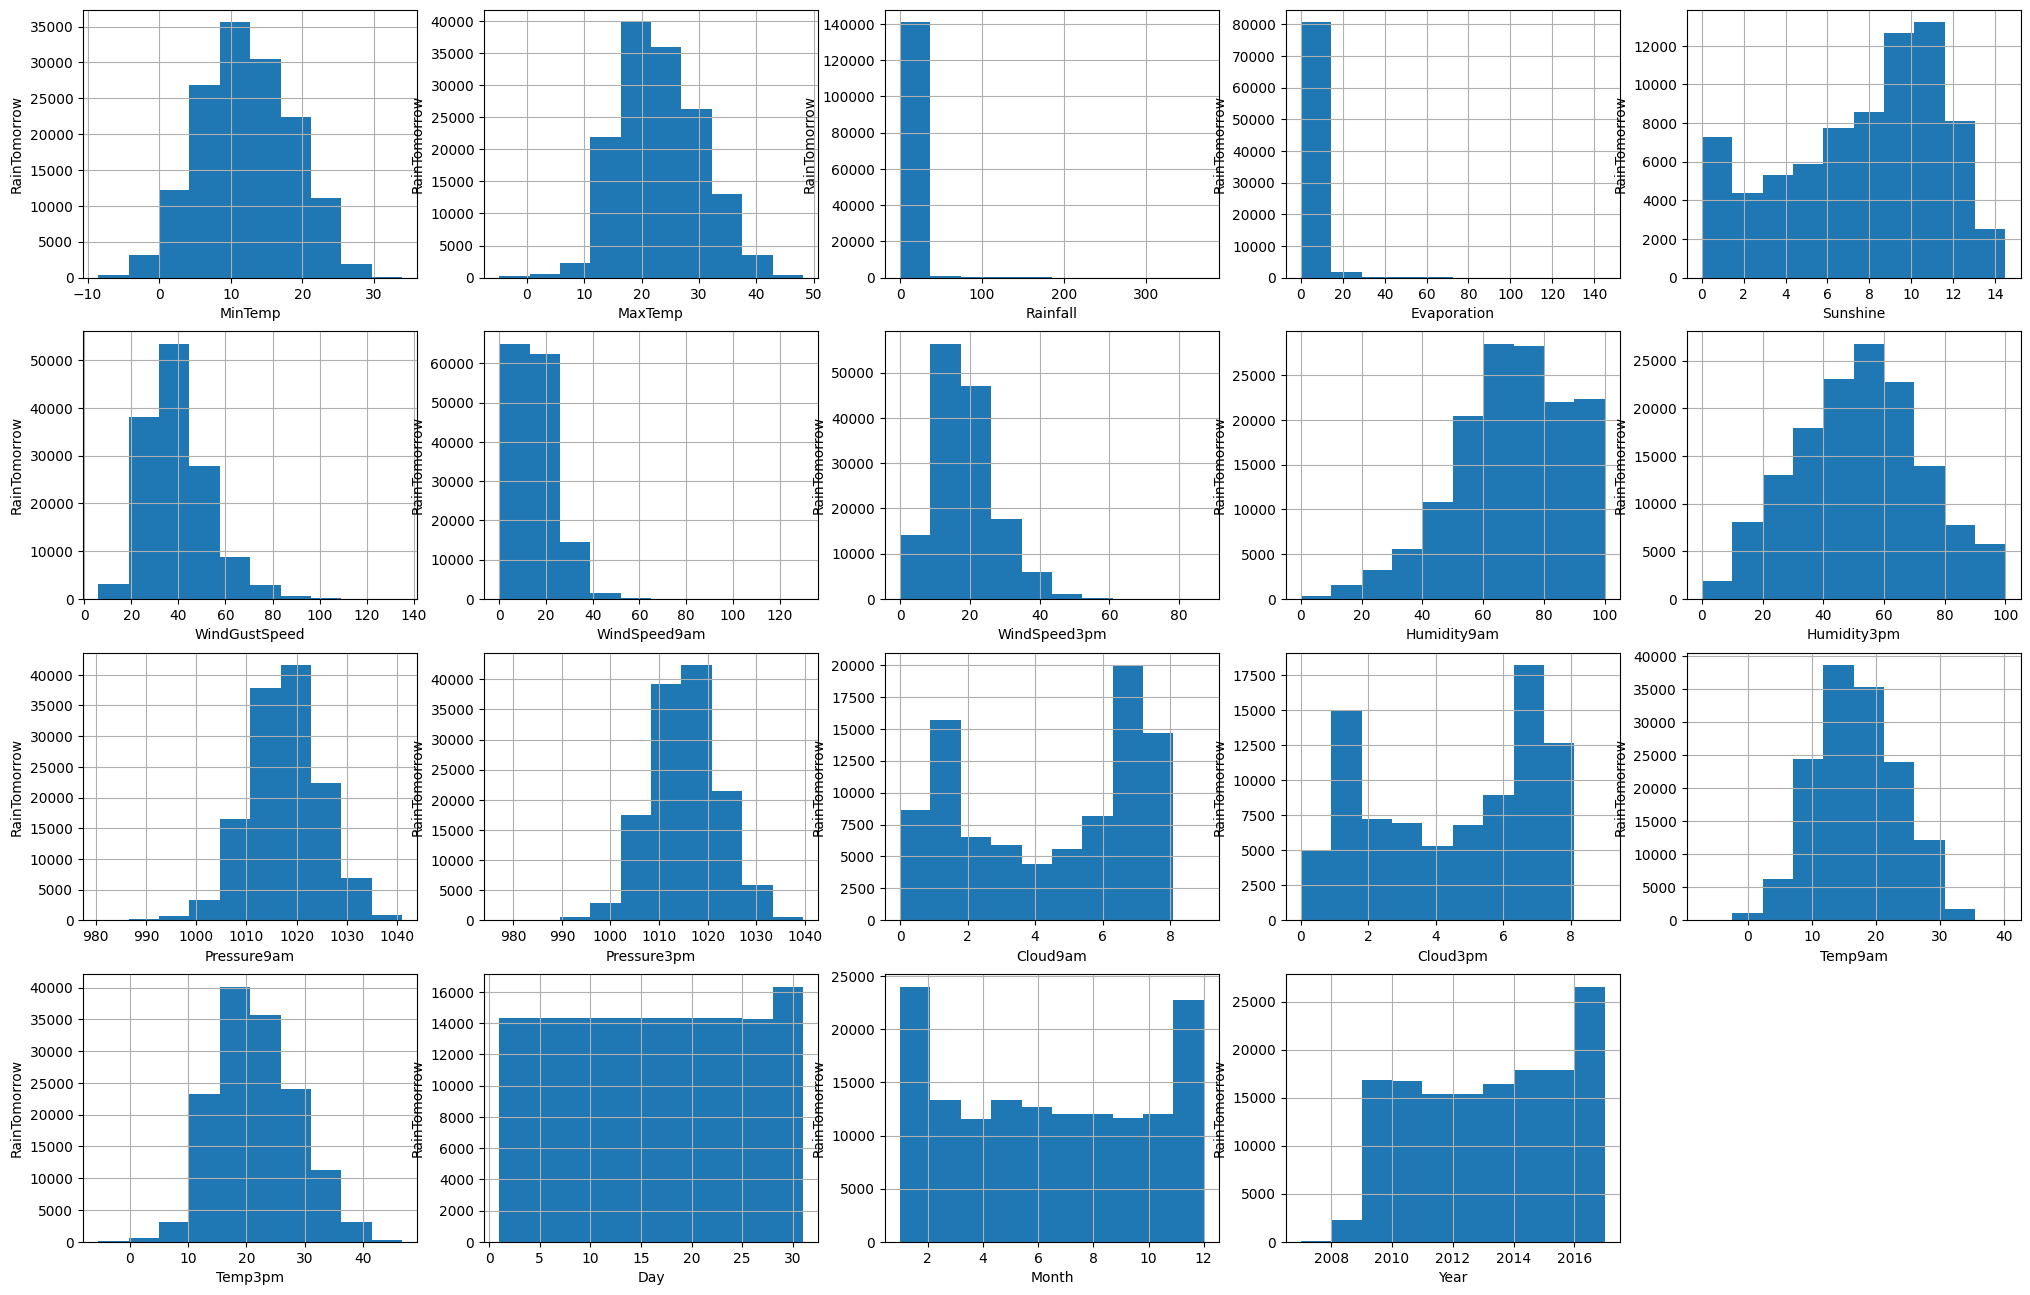

In [17]:
# plot histogram to check distribution

n_rows = 4
n_columns = (len(numerical) // 4) + (len(numerical) % 4 > 0)

plt.figure(figsize=(5*n_columns,4*n_rows))

index = 1

for feature in numerical:
    plt.subplot(n_rows, n_columns, index)
    fig = data[feature].hist(bins=10)
    fig.set_xlabel(feature)
    fig.set_ylabel(target)
    index = index + 1


### Exploring Class Distribution

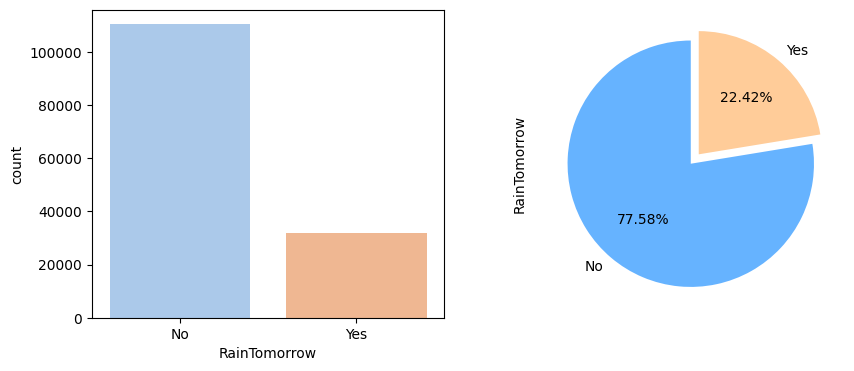

In [18]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(10,4))
labels = data[target].value_counts().index
sns.countplot(x=data[target], data=data, palette="pastel",ax=ax[0])
data[target].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66b3ff','#ffcc99'], 
                                             labels=labels, explode = (0, 0.1), startangle=90)
plt.show()

Most of the classes of ‘RainTomorrow’ is ‘No’. Therefore, this dataset is imbalanced. To address this RepeatedStratifiedKFold cross validation will be used to evaluate the models.

### Multivariate Analysis

Multivariate means involving multiple dependent variables resulting in one outcome. For example, we cannot predict whether it will rain based on the temperature alone. There are multiple factors like wind direction,wind speed, humidity etc. 

**Heatmap**

A heatmap is a graphical representation of data where values are depicted by color. Heat maps make it easy to visualize complex data and understand it at a glance. In this case, the heat map is used to visualize the correlation between any two variables. 

<AxesSubplot: >

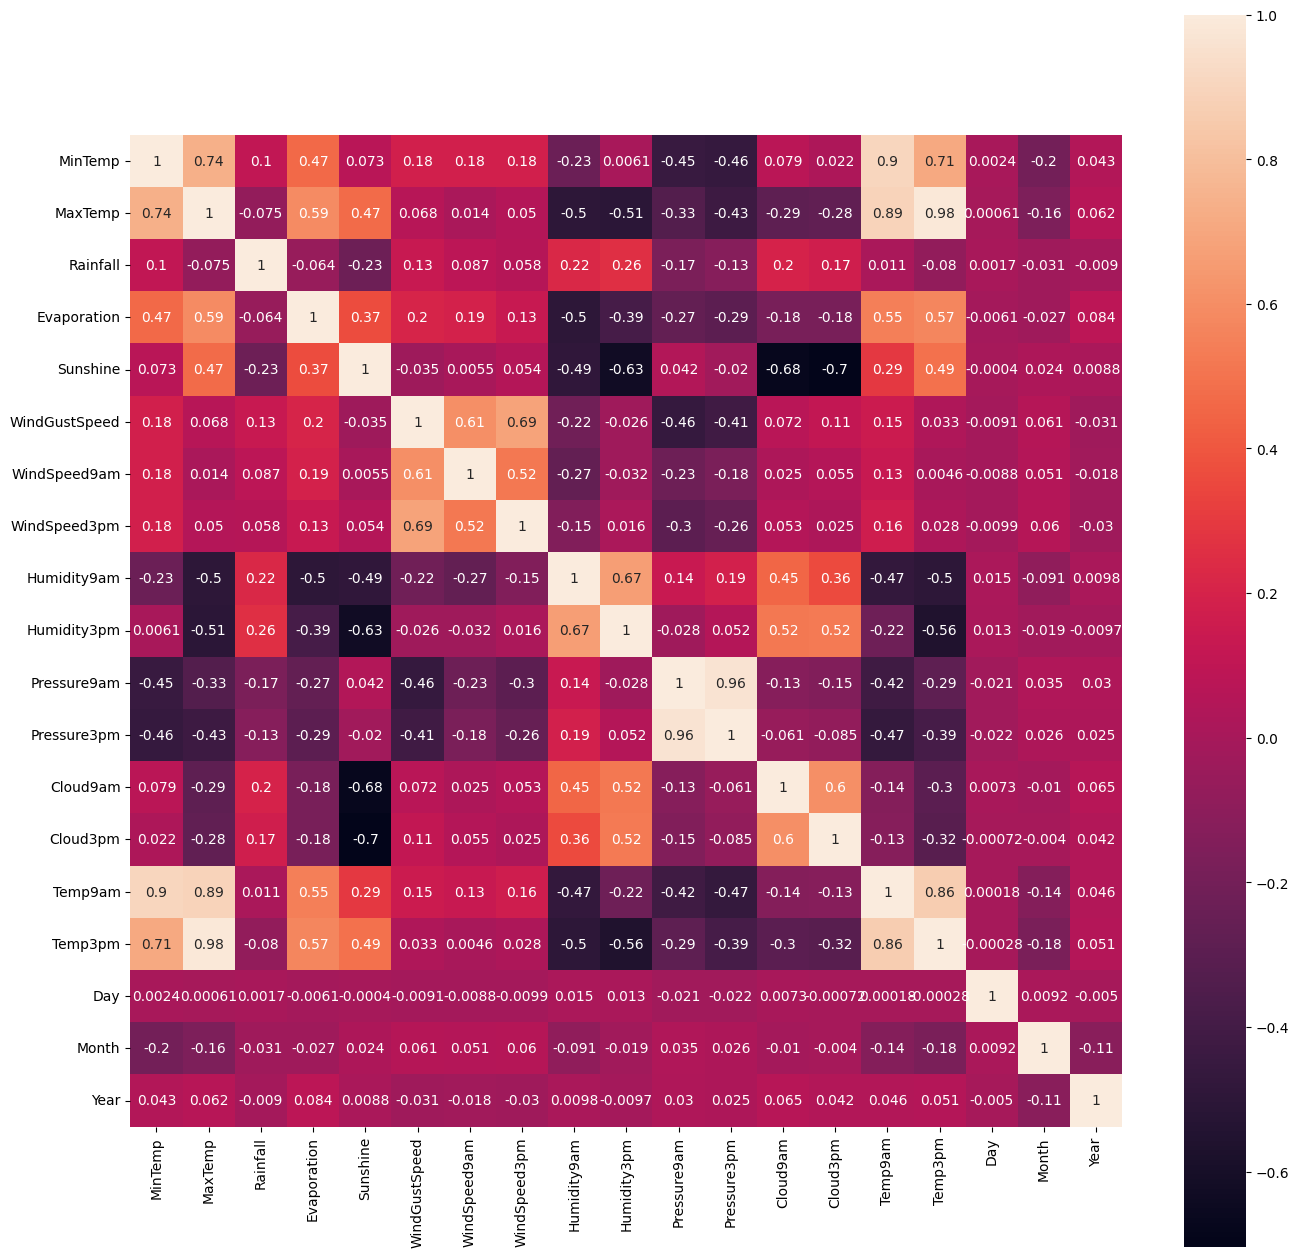

In [19]:
corrmat = data.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corrmat,annot=True, square=True)

**From the above correlation heat map, we can conclude that:**

- MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

- MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

- MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

In [20]:
# Calculate the correlation values
feature_cols = [var for var in data.columns if var != target]

corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
31,MaxTemp,Temp3pm,0.984503,0.984503
135,Pressure9am,Pressure3pm,0.961326,0.961326
13,MinTemp,Temp9am,0.901821,0.901821
30,MaxTemp,Temp9am,0.887210,0.887210
161,Temp9am,Temp3pm,0.860591,0.860591


In [21]:
# Drop columns with correlation higher than 0.95
data = data.drop(corr_values[corr_values.correlation > 0.95].feature2.values, axis=1)

In [22]:
#update numerical variable list
numerical = [var for var in data.columns if data[var].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Day',
 'Month',
 'Year']

### Checking for Duplicates

In [23]:
data.duplicated().sum()

0

## Preparing features and target

In [24]:
X = data.drop([target], axis=1)

y = data[target]

## Splitting data into training and testing sets

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
X_train.shape, X_test.shape

((116368, 22), (29092, 22))

## Handling Missing Values

### Impute Missing Values in Categorical Variables

In [27]:
categorical_features = [var for var in categorical if var != target]

In [28]:
X_train[categorical_features].isnull().sum()

Location          0
WindGustDir    8270
WindDir9am     8448
WindDir3pm     3369
RainToday      2617
dtype: int64

In [29]:
y_train.isnull().sum()

2623

In [30]:
X_test[categorical_features].isnull().sum()

Location          0
WindGustDir    2056
WindDir9am     2118
WindDir3pm      859
RainToday       644
dtype: int64

In [31]:
y_test.isnull().sum()

644

In [32]:
cat_missing = data[categorical_features].columns[data[categorical_features].isnull().any()].tolist()
cat_missing

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

Replace the missing values of the above categorical features with mode.

Modes of categorical features:

In [33]:
for m in cat_missing:
  print(m, '\t', X_train[m].mode()[0])

WindGustDir 	 W
WindDir9am 	 N
WindDir3pm 	 SE
RainToday 	 No


Mode of target:

In [34]:
y_train.mode()[0]

'No'

In [35]:
for m in cat_missing:
  X_train[m].fillna(X_train[m].mode()[0], inplace=True)
  X_test[m].fillna(X_train[m].mode()[0], inplace=True)

In [36]:
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_train.mode()[0], inplace=True)

Check whether all missing values for categorical variables have been removed.

In [37]:
X_train[categorical_features].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [38]:
y_train.isnull().sum()

0

In [39]:
X_test[categorical_features].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [40]:
y_test.isnull().sum()

0

### Impute Missing Values in Numerical Variables

In [41]:
X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Day                  0
Month                0
Year                 0
dtype: int64

In [42]:
X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Day                  0
Month                0
Year                 0
dtype: int64

In [43]:
num_missing = data[numerical].columns[data[numerical].isnull().any()].tolist()
num_missing

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am']

Replace the missing values for the above numerical variables with median.

Medians of numerical variables:

In [44]:
for m in num_missing:
  print(m, '\t', X_train[m].median())

MinTemp 	 12.0
MaxTemp 	 22.6
Rainfall 	 0.0
Evaporation 	 4.7
Sunshine 	 8.4
WindGustSpeed 	 39.0
WindSpeed9am 	 13.0
WindSpeed3pm 	 19.0
Humidity9am 	 70.0
Humidity3pm 	 52.0
Pressure9am 	 1017.6
Cloud9am 	 5.0
Cloud3pm 	 5.0
Temp9am 	 16.7


In [45]:
for m in num_missing:
  X_train[m].fillna(X_train[m].median(), inplace=True)
  X_test[m].fillna(X_train[m].median(), inplace=True)

Check whether all missing values for numerical variables have been removed.

In [46]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Day              0
Month            0
Year             0
dtype: int64

In [47]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Day              0
Month            0
Year             0
dtype: int64

## Engineering Outliers

**Outlier cleaning for training data**

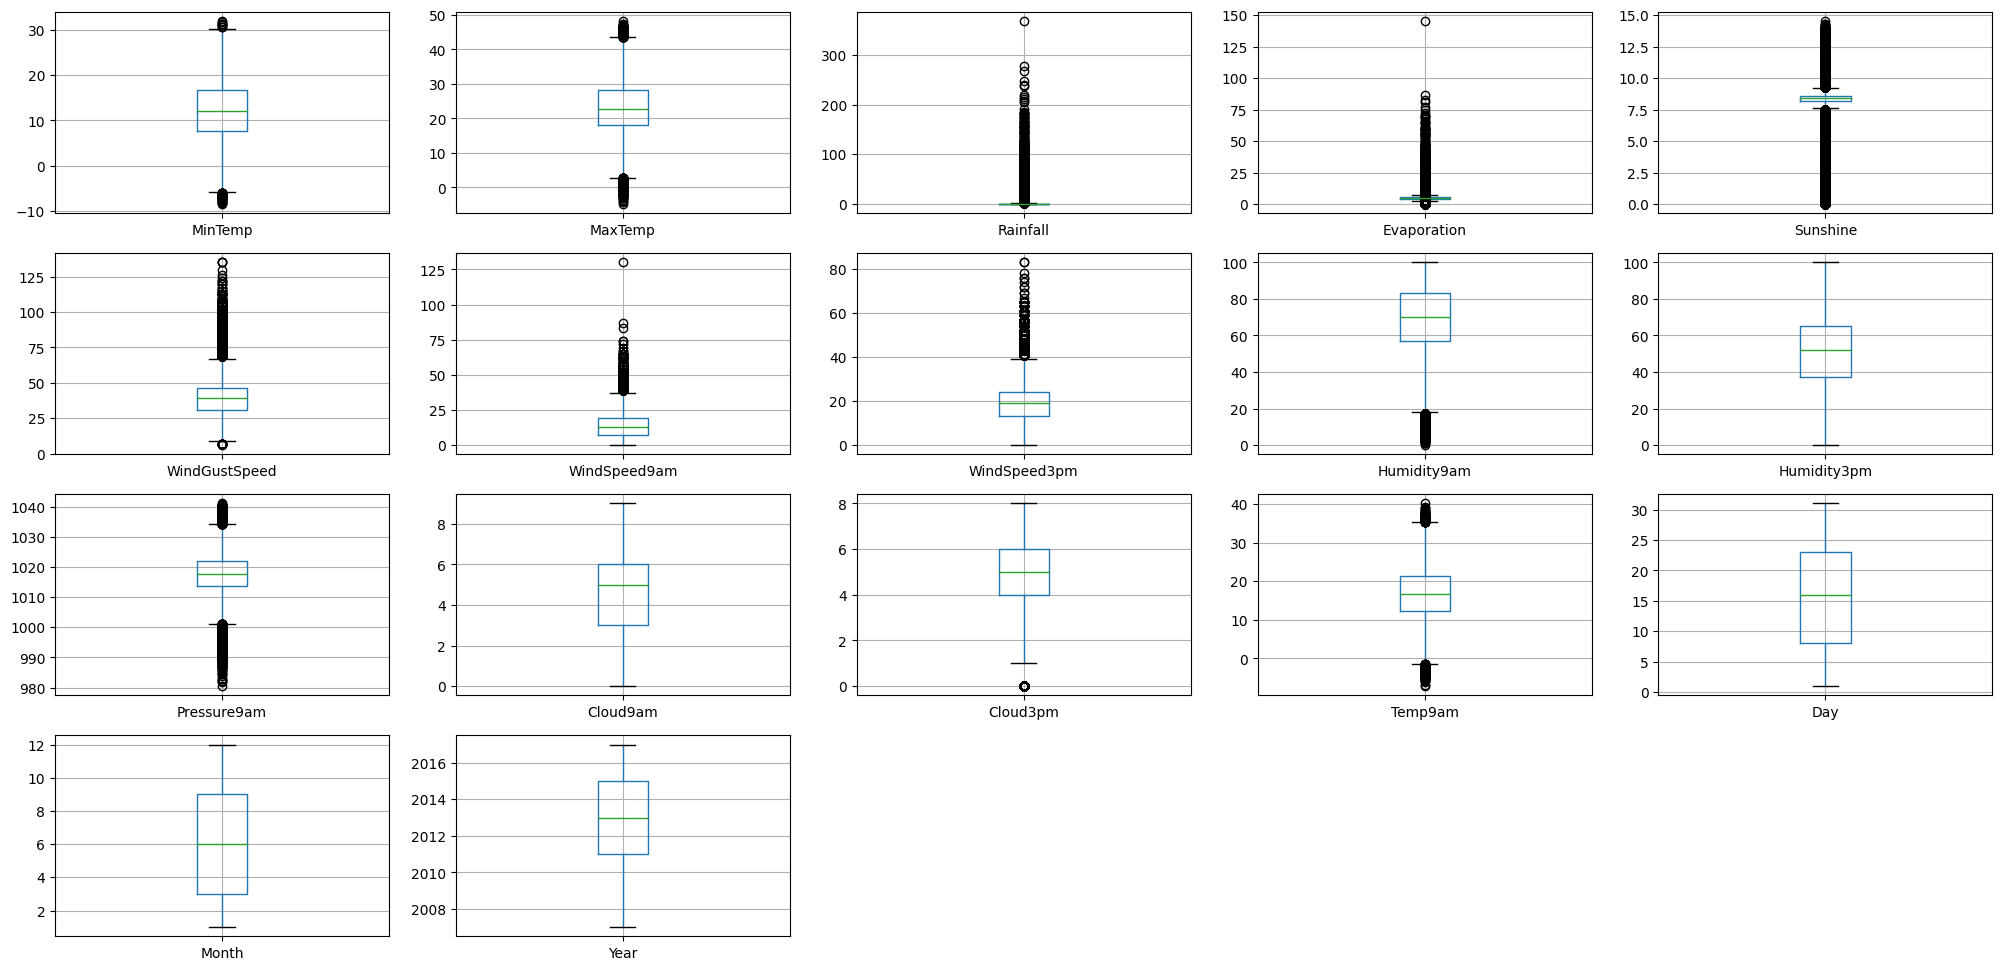

In [48]:
# draw boxplots to visualize outliers

def boxplot_for_outlier(df,columns):
    n_rows = 4
    n_columns = (len(columns) // 4) + (len(columns) % 4 > 0)
    plt.figure(figsize=(5*n_columns,3*n_rows))
    index = 1
    for feature in columns:
        plt.subplot(n_rows, n_columns, index)
        fig = df.boxplot(column=feature)
        index = index + 1

boxplot_for_outlier(X_train, numerical)

In [49]:
outlier_percentage_cutoff = 0.1

lower_and_upper={}
X_train_outlier = X_train.copy()

for feature in numerical:
    q1=X_train_outlier[feature].describe()[4]
    q3=X_train_outlier[feature].describe()[6]
    iqr=q3-q1
    lowerbound = q1 - (1.5 * iqr)
    upperbound = q3 + (1.5 * iqr)
    lower_and_upper[feature]=(lowerbound,upperbound)
    number_of_outlier = X_train_outlier.loc[(X_train_outlier.loc[:,feature]<lowerbound)\
                                                        | (X_train_outlier.loc[:,feature]>upperbound)].shape[0]
    if(number_of_outlier > outlier_percentage_cutoff * X_train_outlier.shape[0]):
        sparse_value = X_train_outlier[feature].mode()[0]
        nonsparse_data = pd.DataFrame(X_train_outlier[X_train_outlier[feature] != sparse_value][feature])
        q1=nonsparse_data[feature].describe()[4]
        q3=nonsparse_data[feature].describe()[6]
        iqr=q3-q1
        lowerbound = q1 - (1.5*iqr)
        upperbound = q3 + (1.5*iqr)
        lower_and_upper[feature]=(lowerbound,upperbound)
        nonsparse_data.loc[(nonsparse_data.loc[:,feature]<lowerbound),feature] =  lowerbound*0.75
        nonsparse_data.loc[(nonsparse_data.loc[:,feature]>upperbound),feature] =  upperbound*1.25
        number_of_outlier = nonsparse_data.loc[(nonsparse_data.loc[:,feature]<lowerbound)\
                                                        | (nonsparse_data.loc[:,feature]>upperbound)].shape[0]
        X_train_outlier[feature][nonsparse_data.index]=nonsparse_data[feature]
        print(number_of_outlier," outlier values cleared in" ,feature)
    else:
        print(number_of_outlier," outlier values cleared in" ,feature)
        X_train_outlier.loc[(X_train_outlier.loc[:,feature]<lowerbound),feature] =  lowerbound*0.75
        X_train_outlier.loc[(X_train_outlier.loc[:,feature]>upperbound),feature] =  upperbound*1.25

74  outlier values cleared in MinTemp
437  outlier values cleared in MaxTemp
4180  outlier values cleared in Rainfall
1569  outlier values cleared in Evaporation
0  outlier values cleared in Sunshine
4432  outlier values cleared in WindGustSpeed
1443  outlier values cleared in WindSpeed9am
2023  outlier values cleared in WindSpeed3pm
1123  outlier values cleared in Humidity9am
0  outlier values cleared in Humidity3pm
2213  outlier values cleared in Pressure9am
0  outlier values cleared in Cloud9am
3964  outlier values cleared in Cloud3pm
254  outlier values cleared in Temp9am
0  outlier values cleared in Day
0  outlier values cleared in Month
0  outlier values cleared in Year


**Outlier cleaning for testing data**




In [50]:
X_test_outlier = X_test.copy()

for feature in numerical:
    number_of_outlier_test = X_test_outlier.loc[(X_test_outlier.loc[:,feature]<lower_and_upper[feature][0])\
                                                | (X_test_outlier.loc[:,feature]>lower_and_upper[feature][1])].shape[0]
    if(number_of_outlier > outlier_percentage_cutoff * X_test_outlier.shape[0]):
        sparse_value = X_test_outlier[feature].mode()[0]
        nonsparse_data = pd.DataFrame(X_test_outlier[X_test_outlier[feature] != sparse_value][feature])
        nonsparse_data.loc[(nonsparse_data.loc[:,feature]<lower_and_upper[feature][0]),feature] =  lower_and_upper[feature][0]*0.75
        nonsparse_data.loc[(nonsparse_data.loc[:,feature]>lower_and_upper[feature][1]),feature] =  lower_and_upper[feature][1]*1.25
        X_test_outlier[feature][nonsparse_data.index]=nonsparse_data[feature]
        number_of_outlier_test = nonsparse_data.loc[(nonsparse_data.loc[:,feature]<lower_and_upper[feature][0])\
                                                | (nonsparse_data.loc[:,feature]>lower_and_upper[feature][1])].shape[0]
        print(number_of_outlier_test," outlier values cleared in" ,feature)
    else:
        print(number_of_outlier_test," outlier values cleared in" ,feature)
        X_test_outlier.loc[(X_test_outlier.loc[:,feature]<lower_and_upper[feature][0]),feature] =  lower_and_upper[feature][0]*0.75
        X_test_outlier.loc[(X_test_outlier.loc[:,feature]>lower_and_upper[feature][1]),feature] =  lower_and_upper[feature][1]*1.25

8  outlier values cleared in MinTemp
107  outlier values cleared in MaxTemp
1040  outlier values cleared in Rainfall
426  outlier values cleared in Evaporation
0  outlier values cleared in Sunshine
1091  outlier values cleared in WindGustSpeed
374  outlier values cleared in WindSpeed9am
500  outlier values cleared in WindSpeed3pm
302  outlier values cleared in Humidity9am
0  outlier values cleared in Humidity3pm
545  outlier values cleared in Pressure9am
0  outlier values cleared in Cloud9am
1010  outlier values cleared in Cloud3pm
53  outlier values cleared in Temp9am
0  outlier values cleared in Day
0  outlier values cleared in Month
0  outlier values cleared in Year


**Visualization after cleaning outliers**

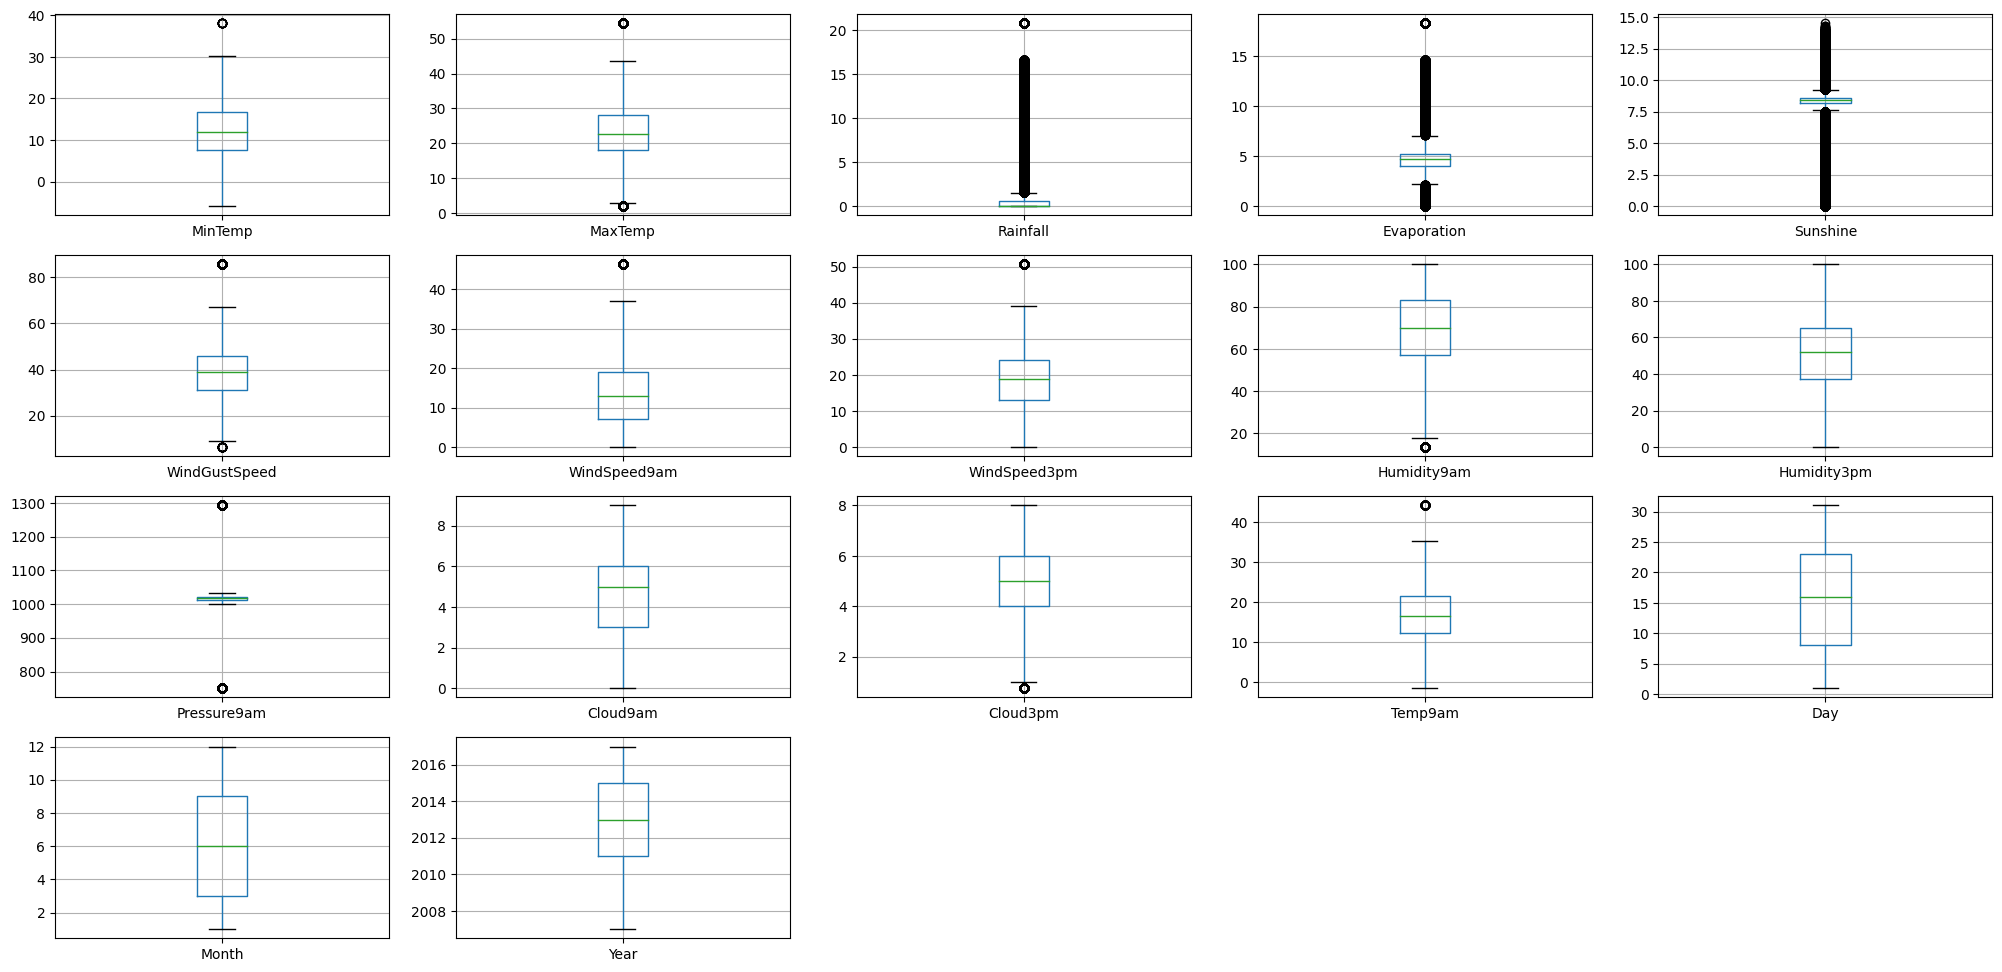

In [51]:
boxplot_for_outlier(X_train_outlier, numerical)

In [52]:
X_test[numerical] = X_test_outlier[numerical]
X_train[numerical] = X_train_outlier[numerical]
pd.options.mode.chained_assignment = None

## Data Encoding

Machine learning models require all input and output variables to be numeric.
This means that if the data contains categorical data, then we must encode it to numbers before we can fit and evaluate a model.


In [53]:
#Binary Encoder for binary variables
#Onehotencoding for categorical data

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
onehotencoder = preprocessing.OneHotEncoder()

###Encoding on Binary Data

In [54]:
# Encoding on train data
for feature in categorical_features:
    if len(X_train[feature].unique()) == 2:
        X_train[feature] = lb.fit_transform(X_train[feature])

In [55]:
# Encoding on test data
for feature in categorical_features:
    if len(X_test[feature].unique()) == 2:
        X_test[feature] = lb.transform(X_test[feature])

In [56]:
# Encoding on target
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

###Encoding on Categorical Data

In [57]:
# Encoding on train data
for feature in categorical_features:
    if len(X_train[feature].unique()) != 2:
        X_train[feature] = pd.Categorical(X_train[feature])
        datasetDummies = pd.get_dummies(X_train[feature], prefix = feature + '_encoded')
        X_train.drop(feature, axis=1, inplace=True)
        X_train = pd.concat([X_train, datasetDummies], axis=1)

In [58]:
# Encoding on test data
for feature in categorical_features:
    if len(X_test[feature].unique()) != 2:
        X_test[feature] = pd.Categorical(X_test[feature])
        datasetDummies = pd.get_dummies(X_test[feature], prefix = feature + '_encoded')
        X_test.drop(feature, axis=1, inplace=True)
        X_test = pd.concat([X_test, datasetDummies], axis=1)

In [59]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,0,0,0,0,0,0,0,0,0,0
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,0,0,0,0,0,0,0,0,0,0
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,0,0,0,0,0,0,1,0,0,0
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,...,0,0,0,0,0,0,0,0,0,0
1867,15.7,17.6,12.4,4.7,8.4,20.0,11.0,13.0,100.0,100.0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,...,0,0,0,0,0,0,0,0,0,0
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,...,0,0,0,0,0,0,0,0,0,0
124058,5.1,17.2,0.2,4.7,8.4,50.0,28.0,22.0,68.0,51.0,...,0,0,0,0,0,0,0,1,0,0
99214,11.9,16.8,1.0,4.7,8.4,28.0,11.0,13.0,80.0,79.0,...,0,0,0,0,0,0,1,0,0,0
25097,7.5,21.3,0.0,4.7,8.4,15.0,2.0,7.0,88.0,52.0,...,0,0,0,0,0,0,0,0,0,0


## Feature Scaling

In [61]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.191959,23.218991,1.797785,5.095941,7.982476,40.310794,14.058450,18.779883,68.957613,51.605828,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,6.365251,7.118774,4.537372,2.795570,2.761639,14.017462,8.921139,8.986487,18.787461,20.439999,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,-5.900000,2.025000,0.000000,0.000000,0.000000,6.375000,0.000000,0.000000,13.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.062500,54.375000,20.750000,18.250000,14.500000,85.625000,46.250000,50.625000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,...,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000
mean,12.200352,23.283256,1.779702,5.124588,8.019541,40.211102,14.042709,18.674189,68.714251,51.343668,...,0.054207,0.059467,0.067407,0.102984,0.062182,0.056132,0.062388,0.070225,0.063798,0.067338
std,6.361647,7.137610,4.526509,2.844149,2.742187,13.990421,8.921983,8.975726,18.993717,20.595273,...,0.226430,0.236500,0.250730,0.303943,0.241490,0.230181,0.241864,0.255531,0.244396,0.250611
min,-5.800000,2.025000,0.000000,0.000000,0.000000,6.375000,0.000000,0.000000,13.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.200000,8.300000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.062500,54.375000,20.750000,18.250000,14.300000,85.625000,46.250000,50.625000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature scaling is for mapping all the feature variables onto the same scale.

In [63]:
cols = X_train.columns

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [65]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [66]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [67]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.411532,0.404852,0.086640,0.279230,0.550516,0.428212,0.303966,0.370961,0.641128,0.516058,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.144788,0.135984,0.218669,0.153182,0.190458,0.176876,0.192889,0.177511,0.217196,0.204400,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.309355,0.305158,0.000000,0.219178,0.565517,0.310726,0.151351,0.256790,0.502890,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.407165,0.393028,0.000000,0.257534,0.579310,0.411672,0.281081,0.375309,0.653179,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.516349,0.500000,0.028916,0.284932,0.593103,0.500000,0.410811,0.474074,0.803468,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_encoded_NNW,WindDir3pm_encoded_NW,WindDir3pm_encoded_S,WindDir3pm_encoded_SE,WindDir3pm_encoded_SSE,WindDir3pm_encoded_SSW,WindDir3pm_encoded_SW,WindDir3pm_encoded_W,WindDir3pm_encoded_WNW,WindDir3pm_encoded_WSW
count,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,...,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000
mean,0.411723,0.406079,0.085769,0.280799,0.553072,0.426954,0.303626,0.368873,0.638315,0.513437,...,0.054207,0.059467,0.067407,0.102984,0.062182,0.056132,0.062388,0.070225,0.063798,0.067338
std,0.144706,0.136344,0.218145,0.155844,0.189116,0.176535,0.192908,0.177298,0.219581,0.205953,...,0.226430,0.236500,0.250730,0.303943,0.241490,0.230181,0.241864,0.255531,0.244396,0.250611
min,0.002275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.307080,0.305158,0.000000,0.230137,0.572414,0.310726,0.151351,0.256790,0.502890,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.407165,0.393028,0.000000,0.257534,0.579310,0.411672,0.281081,0.375309,0.653179,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.516349,0.500000,0.028916,0.295890,0.600000,0.500000,0.410811,0.474074,0.803468,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.986207,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Models Nested Cross Validation
Performed feature selection and hyperparameter tuning simultaneously and use nested cross validation to mitigate overfitting

The performance metrics used to evaluate the models are accuracy, balanced accuracy, precision, recall, F1, PR-AUC, ROC-AUC, Cohen Kappa, Fit Time and Score Time.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import make_scorer, cohen_kappa_score

#from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
import pickle

from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold

import pickle

In [70]:
models =[]
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier()))
models.append(("K-Nearest Neighbors", KNeighborsClassifier())) 
models.append(("MLP Classifier", MLPClassifier())) 
models.append(("Gaussian Naive Bayes", GaussianNB())) 
models.append(("Bernoulli Naive Bayes", BernoulliNB())) 
models.append(("Multinomial Naive Bayes", MultinomialNB())) 
models.append(("SVC", SVC()))
models.append(("SGD Classifier", SGDClassifier()))
models.append(("Random Forest Classifier", RandomForestClassifier()))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier()))
models.append(("Ada Boost Classifier", AdaBoostClassifier()))

params = {'Logistic Regression' : {'model__penalty':['l1', 'l2'],
        'model__C':[0.1, 1, 10, 100],
        'model__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        },
        'Decision Tree Classifier' : {'model__criterion':['gini', 'entropy'],
        'model__max_depth': range(1,10),
        'model__min_samples_split': range(1,10),
        'model__min_samples_leaf' : range(1,5)
        },
        'K-Nearest Neighbors' : {'model__n_neighbors': range(1,30),
        'model__leaf_size': range(1,50),
        'model__p': (1,2),
        'model__weights': ('uniform', 'distance'),
        'model__metric': ('minkowski', 'chebyshev')
        },
        'MLP Classifier' : {'model__solver' : ['lbfgs', 'sgd', 'adam'], 
        'model__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'model__activation': ['logistic', 'tanh', 'relu'],
        'model__alpha': [0.0001, 0.05],
        'model__learning_rate': ['constant','adaptive']
        },
        'Gaussian Naive Bayes' : {'model__priors': [None, [0.1,]* 2,], # 2 used for multiplication is the number of classes
        'model__var_smoothing': [1e-9, 1e-6, 1e-12]
        },
        'Bernoulli Naive Bayes' : {'model__alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
        'model__fit_prior': [True, False],
        'model__class_prior': [None, [0.1,]* 2, ], # 2 used for multiplication is the number of classes
        'model__binarize': [None, 0.0, 8.5, 10.0]
        },
        'Multinomial Naive Bayes' : {'model__alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
        'model__fit_prior': [True, False],
        'model__class_prior': [None, [0.1,]* 2, ] # 2 used for multiplication is the number of classes
        },
        'SVC' : {'model__gamma':[0.5, 1, 2, 10],
        'model__C':[0.1, 1, 10, 100],
        'model__kernel':['linear', 'rbf', 'poly', 'sigmoid']
        },
        'SGD Classifier' : {'model__loss' : ['hinge', 'log', 'squared_hinge', 'modified_huber'],
        'model__alpha' : [0.0001, 0.001, 0.01, 0.1],
        'model__penalty' : ['l2', 'l1', 'none']
        },
        'Random Forest Classifier' : {'model__n_estimators': [200, 500],
        'model__max_features': ['auto', 'sqrt', 'log2'],
        'model__max_depth' : [4,5,6,7,8],
        'model__criterion' :['gini', 'entropy']
        },
        'Gradient Boosting Classifier' : {'model__loss':['deviance', 'exponential'],
        'model__learning_rate':[0.05, 0.1, 0.2],
        'model__n_estimators':[50, 100, 150],
        'model__criterion':['friedman_mse', 'mse'],
        'model__min_samples_split':[0.1, 1, 10],
        'model__min_samples_leaf':[0.1, 0.5, 1, 5],
        'model__max_depth':[3, 5, 8],
        'model__max_features':['log2', 'sqrt']
        },
        'Ada Boost Classifier' : {'model__n_estimators':[10, 50, 100, 500, 1000],
        'model__learning_rate':[.001, 0.01, 0.1, 1.0]
        },
        'selector' : {'selector__k' : range(20, 101, 2)
        }
}

scoring = {'accuracy': 'accuracy',
          'balanced_accuracy': 'balanced_accuracy',
          'precision_macro': 'precision_macro',
          'recall_macro': 'recall_macro',
          'f1_macro': 'f1_macro',
          'average_precision': 'average_precision',
          'roc_auc': 'roc_auc',
          'cohen_kappa': make_scorer(cohen_kappa_score)}

In [71]:
import csv

inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

best_features_list = {}
models_tuned = {}

for name, model in models:
  pipe = Pipeline([('selector', SelectKBest(mutual_info_classif, k=30)), ('model', model)])
  search_space = []
  search_space.append(params['selector'])
  search_space.append(params[name])
  search_space
  clf = RandomizedSearchCV(pipe, search_space,
                             n_jobs=-1, refit='cohen_kappa', cv=inner_cv,
                             scoring=scoring, random_state=42)
  clf.fit(X_train, y_train)
  features = X_train.columns[clf.best_estimator_.named_steps['selector'].get_support()]
  best_features_list[name] = features
  models_tuned[name] = clf.best_estimator_[1]

  # save the tuned model to disk
  filename = name
  outfile = open(filename, 'wb')
  pickle.dump(clf, outfile)
  outfile.close()

In [72]:
# save the best feature list
features_list = csv.writer(open("best_features_list.csv", "w"))

for key, val in best_features_list.items():
        features_list.writerow([key, val])

# save the models_tuned list
outfile = open('models_tuned', 'wb')
pickle.dump(models_tuned, outfile)
outfile.close()

In [73]:
# # load models_tune list
# models_tuned = pickle.load(open('models_tuned', 'rb'))
    
# # load the model from disk
# loaded_model_list=[]
# for model in models:
#   filename = model[0]
#   loaded_model = pickle.load(open(filename, 'rb'))
#   loaded_model_list.append((model[0], loaded_model))

In [74]:
print(best_features_list)

{'Logistic Regression': MultiIndex([(                          'MinTemp',),
            (                          'MaxTemp',),
            (                         'Rainfall',),
            (                      'Evaporation',),
            (                         'Sunshine',),
            (                    'WindGustSpeed',),
            (                     'WindSpeed9am',),
            (                     'WindSpeed3pm',),
            (                      'Humidity9am',),
            (                      'Humidity3pm',),
            (                      'Pressure9am',),
            (                         'Cloud9am',),
            (                         'Cloud3pm',),
            (                          'Temp9am',),
            (                        'RainToday',),
            (                              'Day',),
            (                            'Month',),
            (                             'Year',),
            (        'Location_encoded_A

In [75]:
print(models_tuned)

{'Logistic Regression': LogisticRegression(), 'Decision Tree Classifier': DecisionTreeClassifier(max_depth=9, min_samples_split=8), 'K-Nearest Neighbors': KNeighborsClassifier(leaf_size=32, n_neighbors=10, p=1, weights='distance'), 'MLP Classifier': MLPClassifier(), 'Gaussian Naive Bayes': GaussianNB(), 'Bernoulli Naive Bayes': BernoulliNB(alpha=0.01, binarize=None, class_prior=[0.1, 0.1], fit_prior=False), 'Multinomial Naive Bayes': MultinomialNB(class_prior=[0.1, 0.1]), 'SVC': SVC(), 'SGD Classifier': SGDClassifier(), 'Random Forest Classifier': RandomForestClassifier(), 'Gradient Boosting Classifier': GradientBoostingClassifier(learning_rate=0.2, loss='exponential', max_depth=8,
                           max_features='log2', min_samples_leaf=5,
                           min_samples_split=0.1, n_estimators=150), 'Ada Boost Classifier': AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)}


In [76]:
scores_accuracy = []
scores_balanced_accuracy = []
scores_precision = []
scores_recall = []
scores_f1 = []
scores_average_precision = []
scores_roc_auc = []
scores_cohen_kappa = []
fit_time = []
score_time = []

for name, model in models_tuned.items():
  score = cross_validate(model, X_train[best_features_list[name]], y_train, cv=outer_cv, scoring=scoring, n_jobs=-1, return_train_score=False)
  scores_accuracy.append(score['test_accuracy'].mean())
  scores_balanced_accuracy.append(score['test_balanced_accuracy'].mean())
  scores_precision.append(score['test_precision_macro'].mean())
  scores_recall.append(score['test_recall_macro'].mean())
  scores_f1.append(score['test_f1_macro'].mean())
  scores_average_precision.append(score['test_average_precision'].mean())
  scores_roc_auc.append(score['test_roc_auc'].mean())
  scores_cohen_kappa.append(score['test_cohen_kappa'].mean())
  fit_time.append(score['fit_time'].mean())
  score_time.append(score['score_time'].mean())

performance = pd.DataFrame({
    'Model': [name for name in models_tuned],
    'Accuracy': scores_accuracy,
    'Balanced Accuracy': scores_balanced_accuracy,
    'Precision': scores_precision,
    'Recall': scores_recall,
    'F1': scores_f1,
    'PR-AUC': scores_average_precision,
    'ROC-AUC': scores_roc_auc,
    'Cohen Kappa': scores_cohen_kappa,
    'Fit Time': fit_time,
    'Score Time': score_time
  })

In [77]:
performance.to_csv('performance1.csv')

In [78]:
display(performance)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time
0,Logistic Regression,0.843213,0.710804,0.789732,0.710804,0.737299,0.668975,0.857195,0.479309,7.309259,0.032114
1,Decision Tree Classifier,0.838658,0.702573,0.781776,0.702573,0.728539,0.640636,0.842050,0.462259,1.061263,0.030618
2,K-Nearest Neighbors,0.832927,0.686879,0.774011,0.686879,0.713391,0.623003,0.826953,0.433688,0.109208,85.822182
3,MLP Classifier,0.844416,0.724670,0.785689,0.724670,0.746970,0.676286,0.858961,0.496905,172.477529,0.065425
4,Gaussian Naive Bayes,0.760123,0.707410,0.672559,0.707410,0.683880,0.498798,0.779662,0.371874,0.231979,0.060140
5,Bernoulli Naive Bayes,0.762821,0.703260,0.672653,0.703260,0.683341,0.541749,0.796869,0.369771,0.079886,0.032413
6,Multinomial Naive Bayes,0.756222,0.675775,0.657155,0.675775,0.664553,0.489161,0.756779,0.330502,0.087366,0.033611
7,SVC,0.848876,0.703971,0.814038,0.703971,0.736300,0.692642,0.854356,0.480255,1569.995374,308.146263
8,SGD Classifier,0.841975,0.697550,0.795896,0.697550,0.726859,0.667876,0.854632,0.460975,0.628832,0.023041
9,Random Forest Classifier,0.853216,0.719381,0.814764,0.719381,0.750118,0.705919,0.874515,0.505732,38.382295,1.144543


## Shortlisting Best Models

To shortlist the best models, we compare the performance of the models based on balanced accuracy, F1, PR-AUC, ROC-AUC, Cohen's Kappa score and Fit Time.

- Balanced Accuracy, F1, PR-AUC, ROC-AUC, Cohen's Kappa scores are used because they are more appropriate to evaluate the performance of models on an imbalanced dataset.

In [79]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [80]:
balanced_accuracy_scores = performance['Balanced Accuracy']
f1_scores = performance['F1']
pr_auc_scores = performance['PR-AUC']
roc_auc_scores = performance['ROC-AUC']
coh_kap_scores = performance['Cohen Kappa']
tt = performance['Fit Time']

model_data = {'Model': ['Logistic Regression','Decision Tree Classifier','K-Nearest Neighbors',
                        'MLP Classifier','Gaussian Naive Bayes','Bernoulli Naive Bayes',
                        'Multinomial Naive Bayes', 'SVC', 'SGD Classifier',
                        'Random Forest Classifier', 'Gradient Boosting Classifier', 'Ada Boost Classifier'],
              'Balanced Accuracy': balanced_accuracy_scores,
              'F1' : f1_scores,
              'PR_AUC': pr_auc_scores,
              'ROC_AUC' : roc_auc_scores,
              'Cohen Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

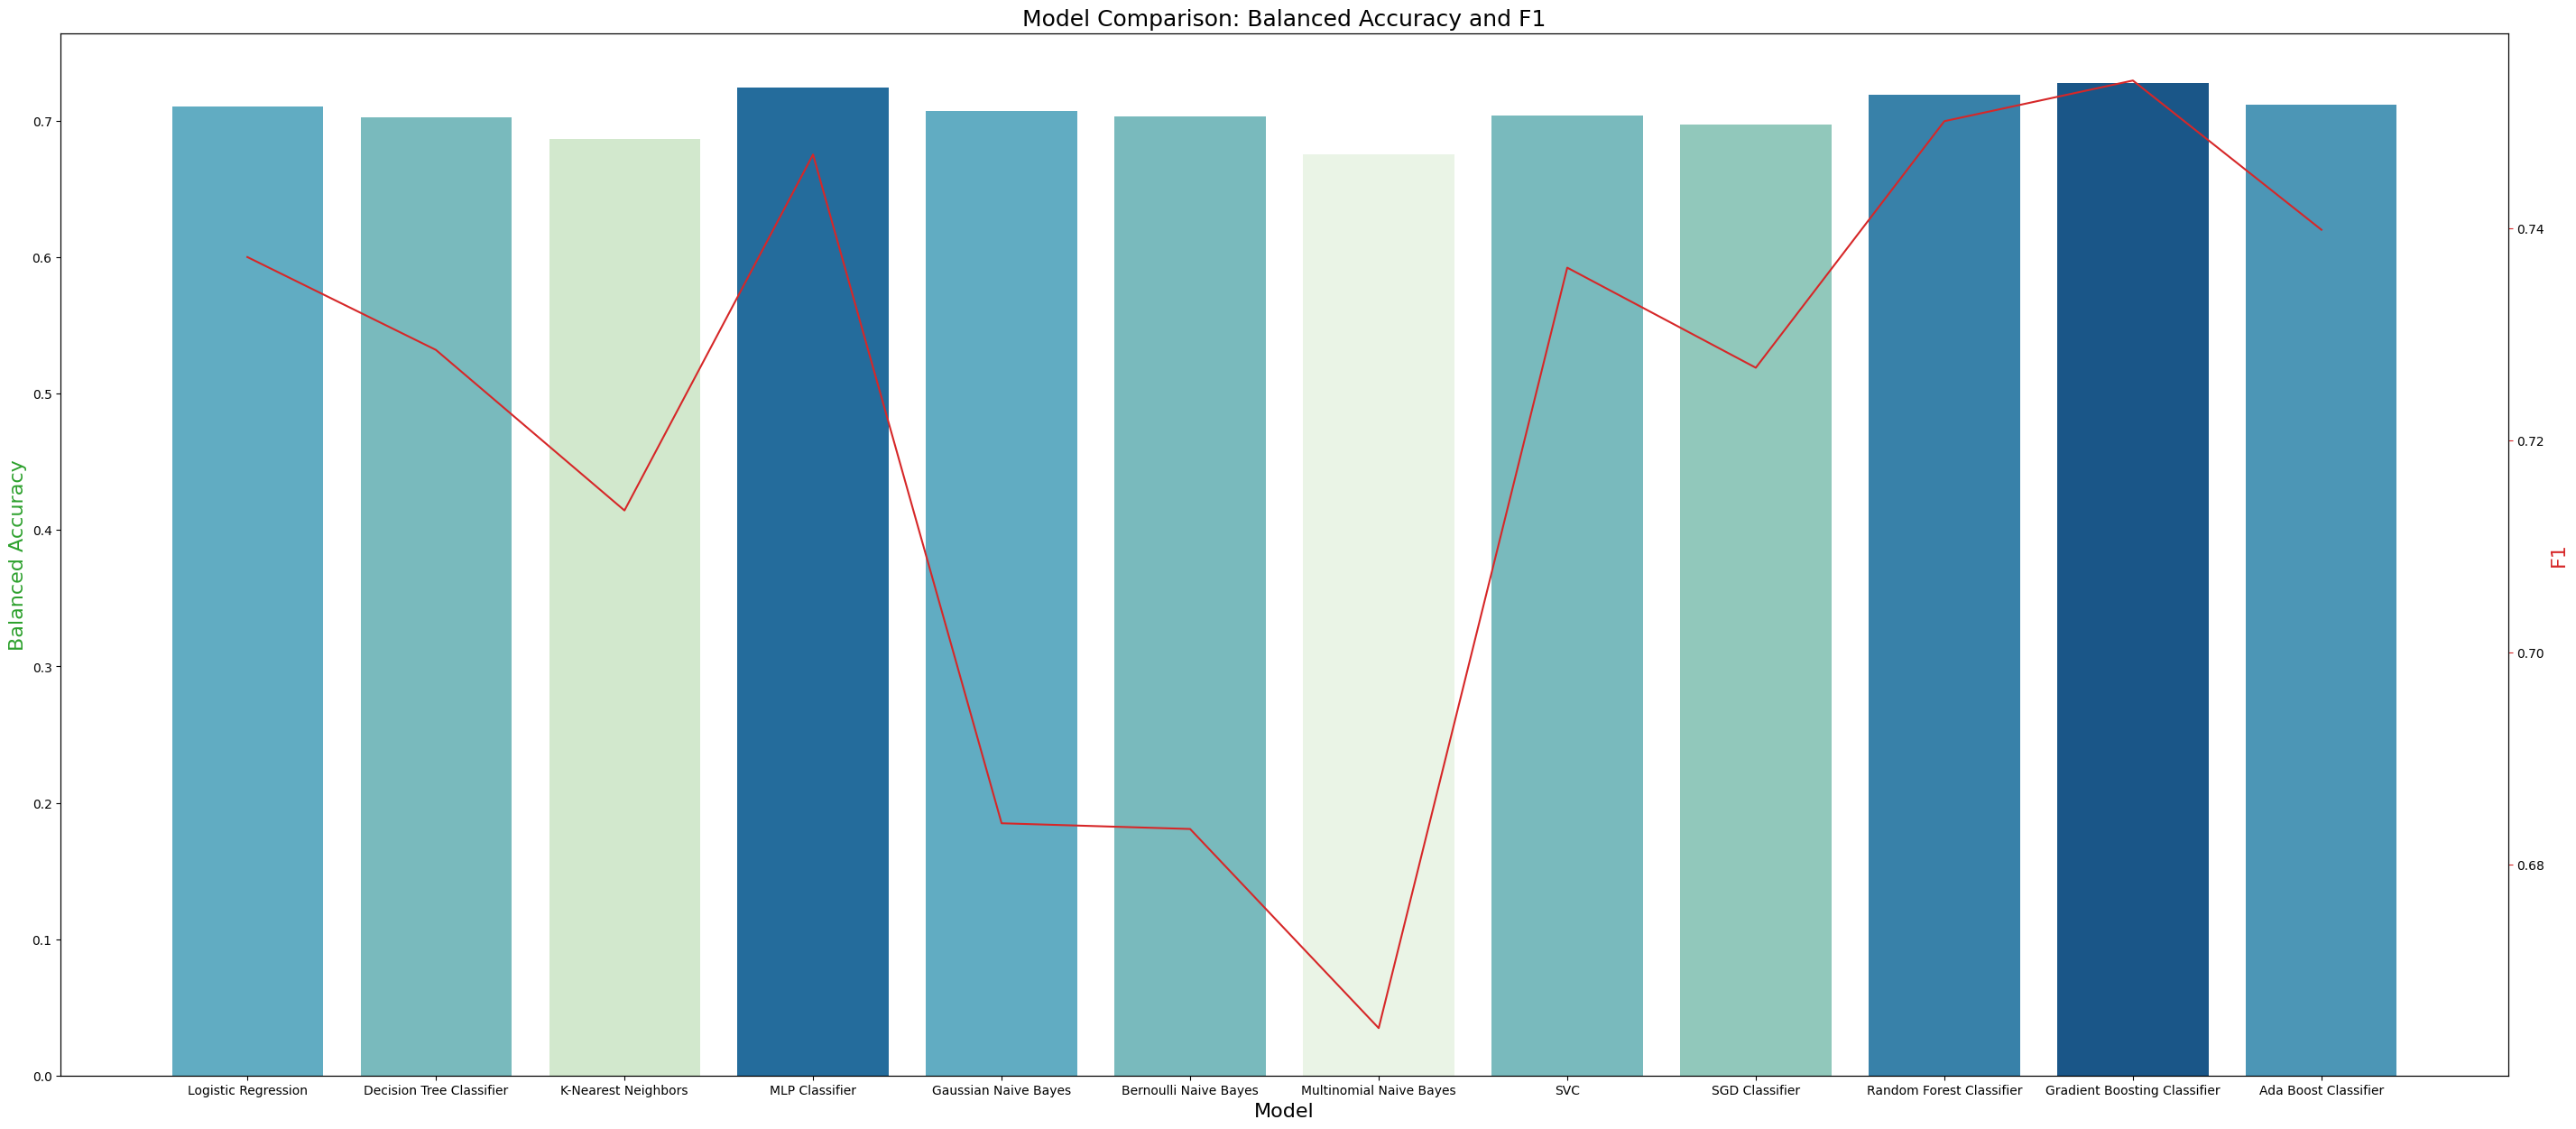

In [81]:
fig, ax1 = plt.subplots(figsize=(35,15))
ax1.set_title('Model Comparison: Balanced Accuracy and F1', fontsize=18)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=16)
ax1.set_ylabel('Balanced Accuracy', fontsize=16, color=color)
ax2 = sns.barplot(x='Model', y='Balanced Accuracy', data = data, palette=colors_from_values(data['Balanced Accuracy'], "GnBu"))
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('F1', fontsize=16, color=color)
ax2 = sns.lineplot(x='Model', y='F1', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

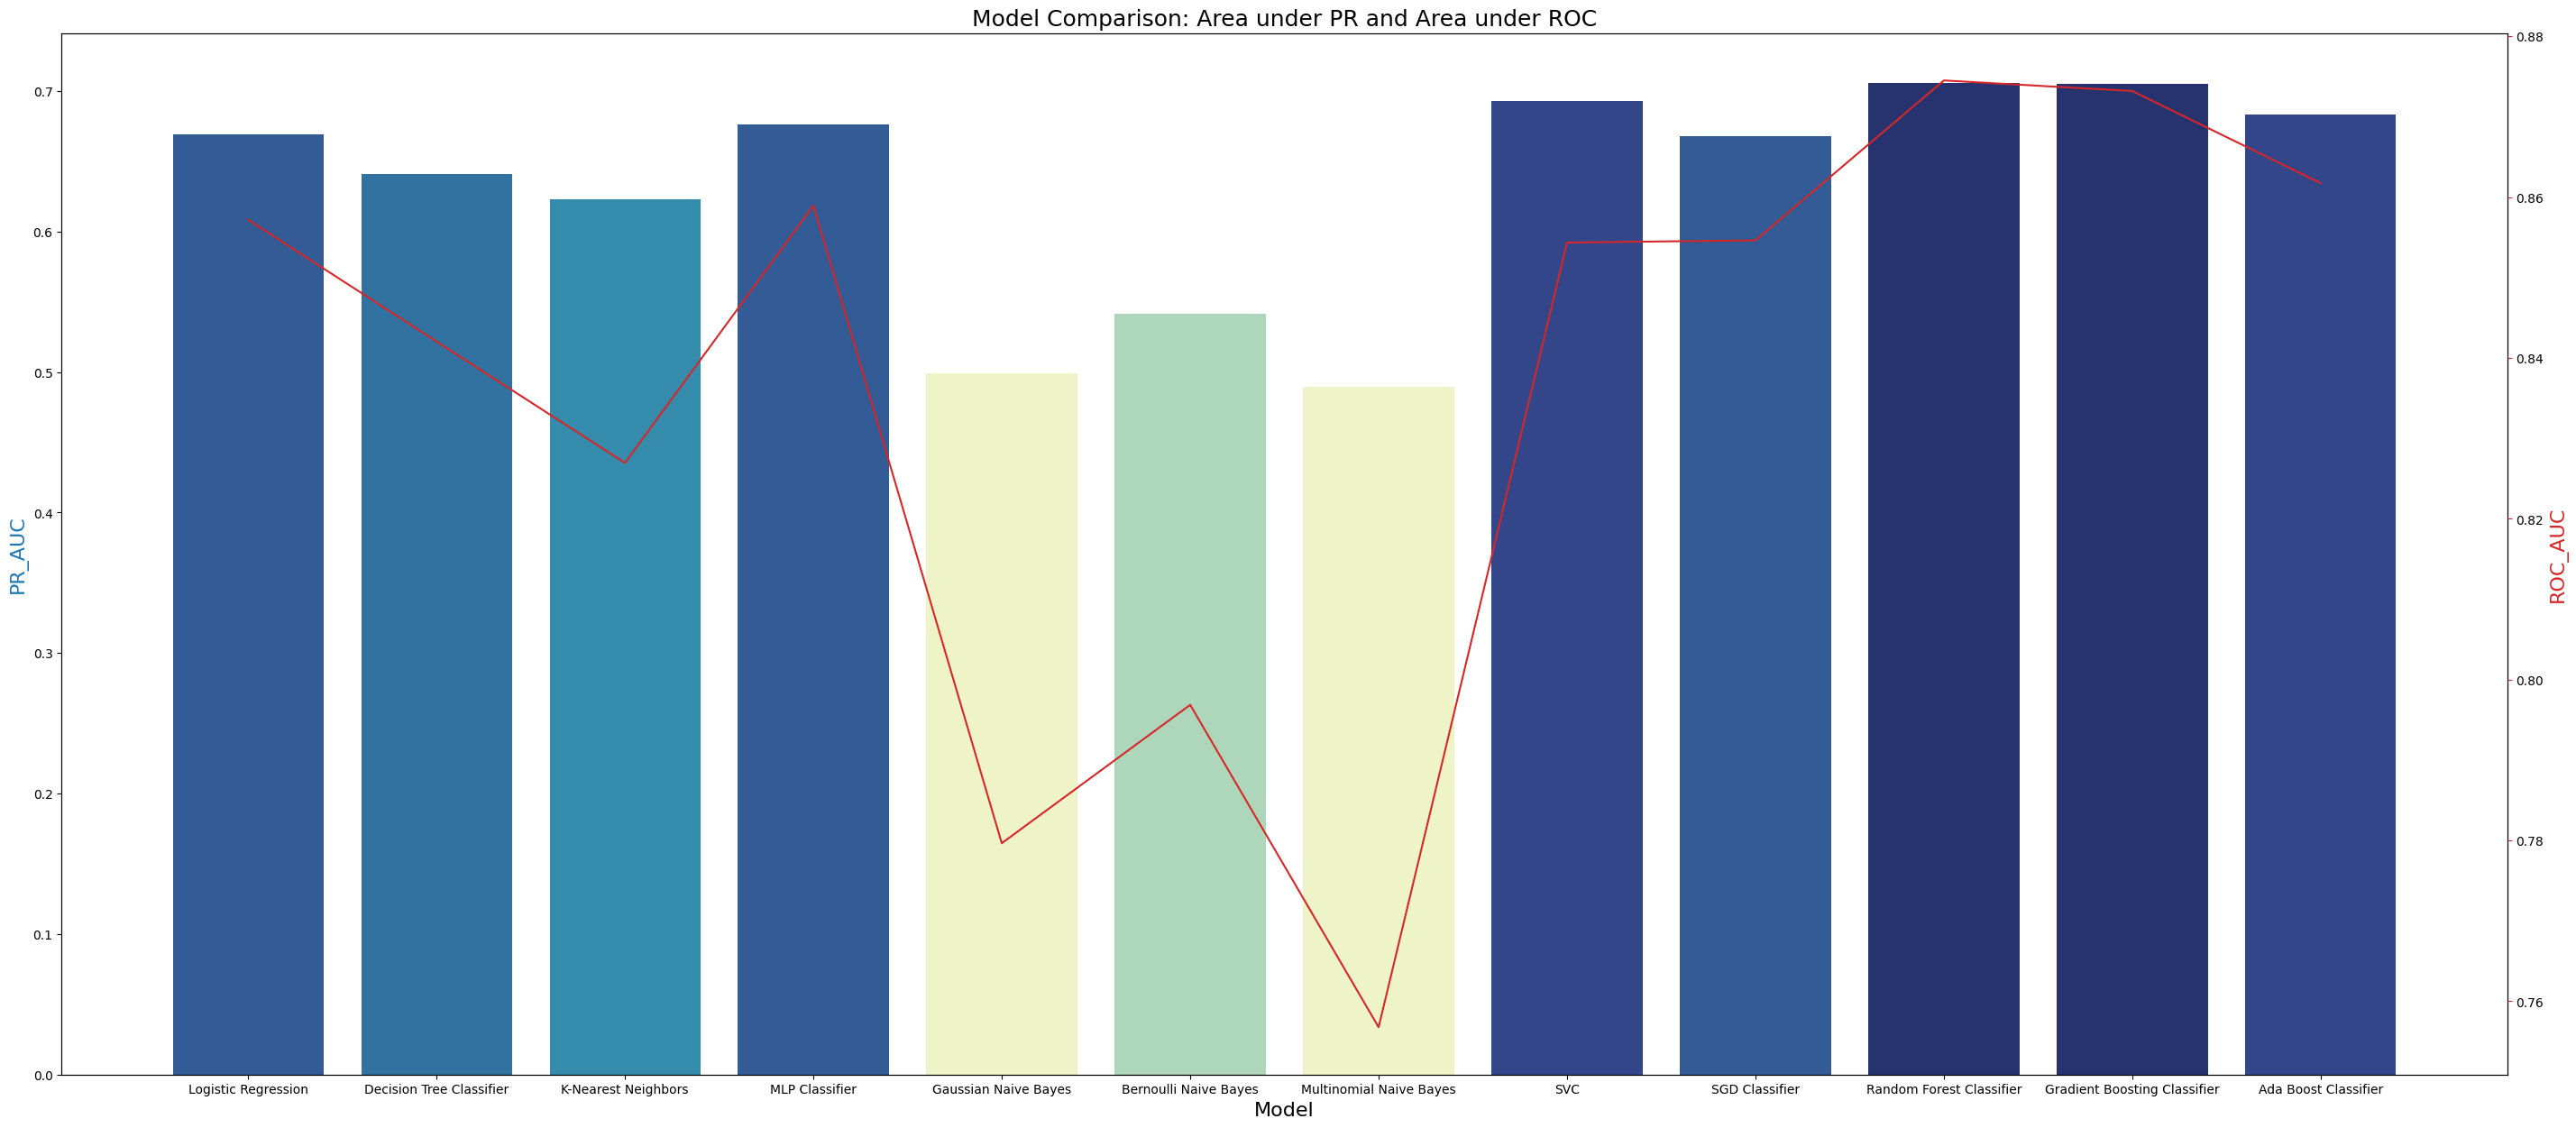

In [82]:
fig, ax3 = plt.subplots(figsize=(35,15))
ax3.set_title('Model Comparison: Area under PR and Area under ROC', fontsize=18)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=16)
ax3.set_ylabel('PR_AUC', fontsize=16, color=color)
ax4 = sns.barplot(x='Model', y='PR_AUC', data = data, palette=colors_from_values(data['PR_AUC'], "YlGnBu"))
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('ROC_AUC', fontsize=16, color=color)
ax4 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

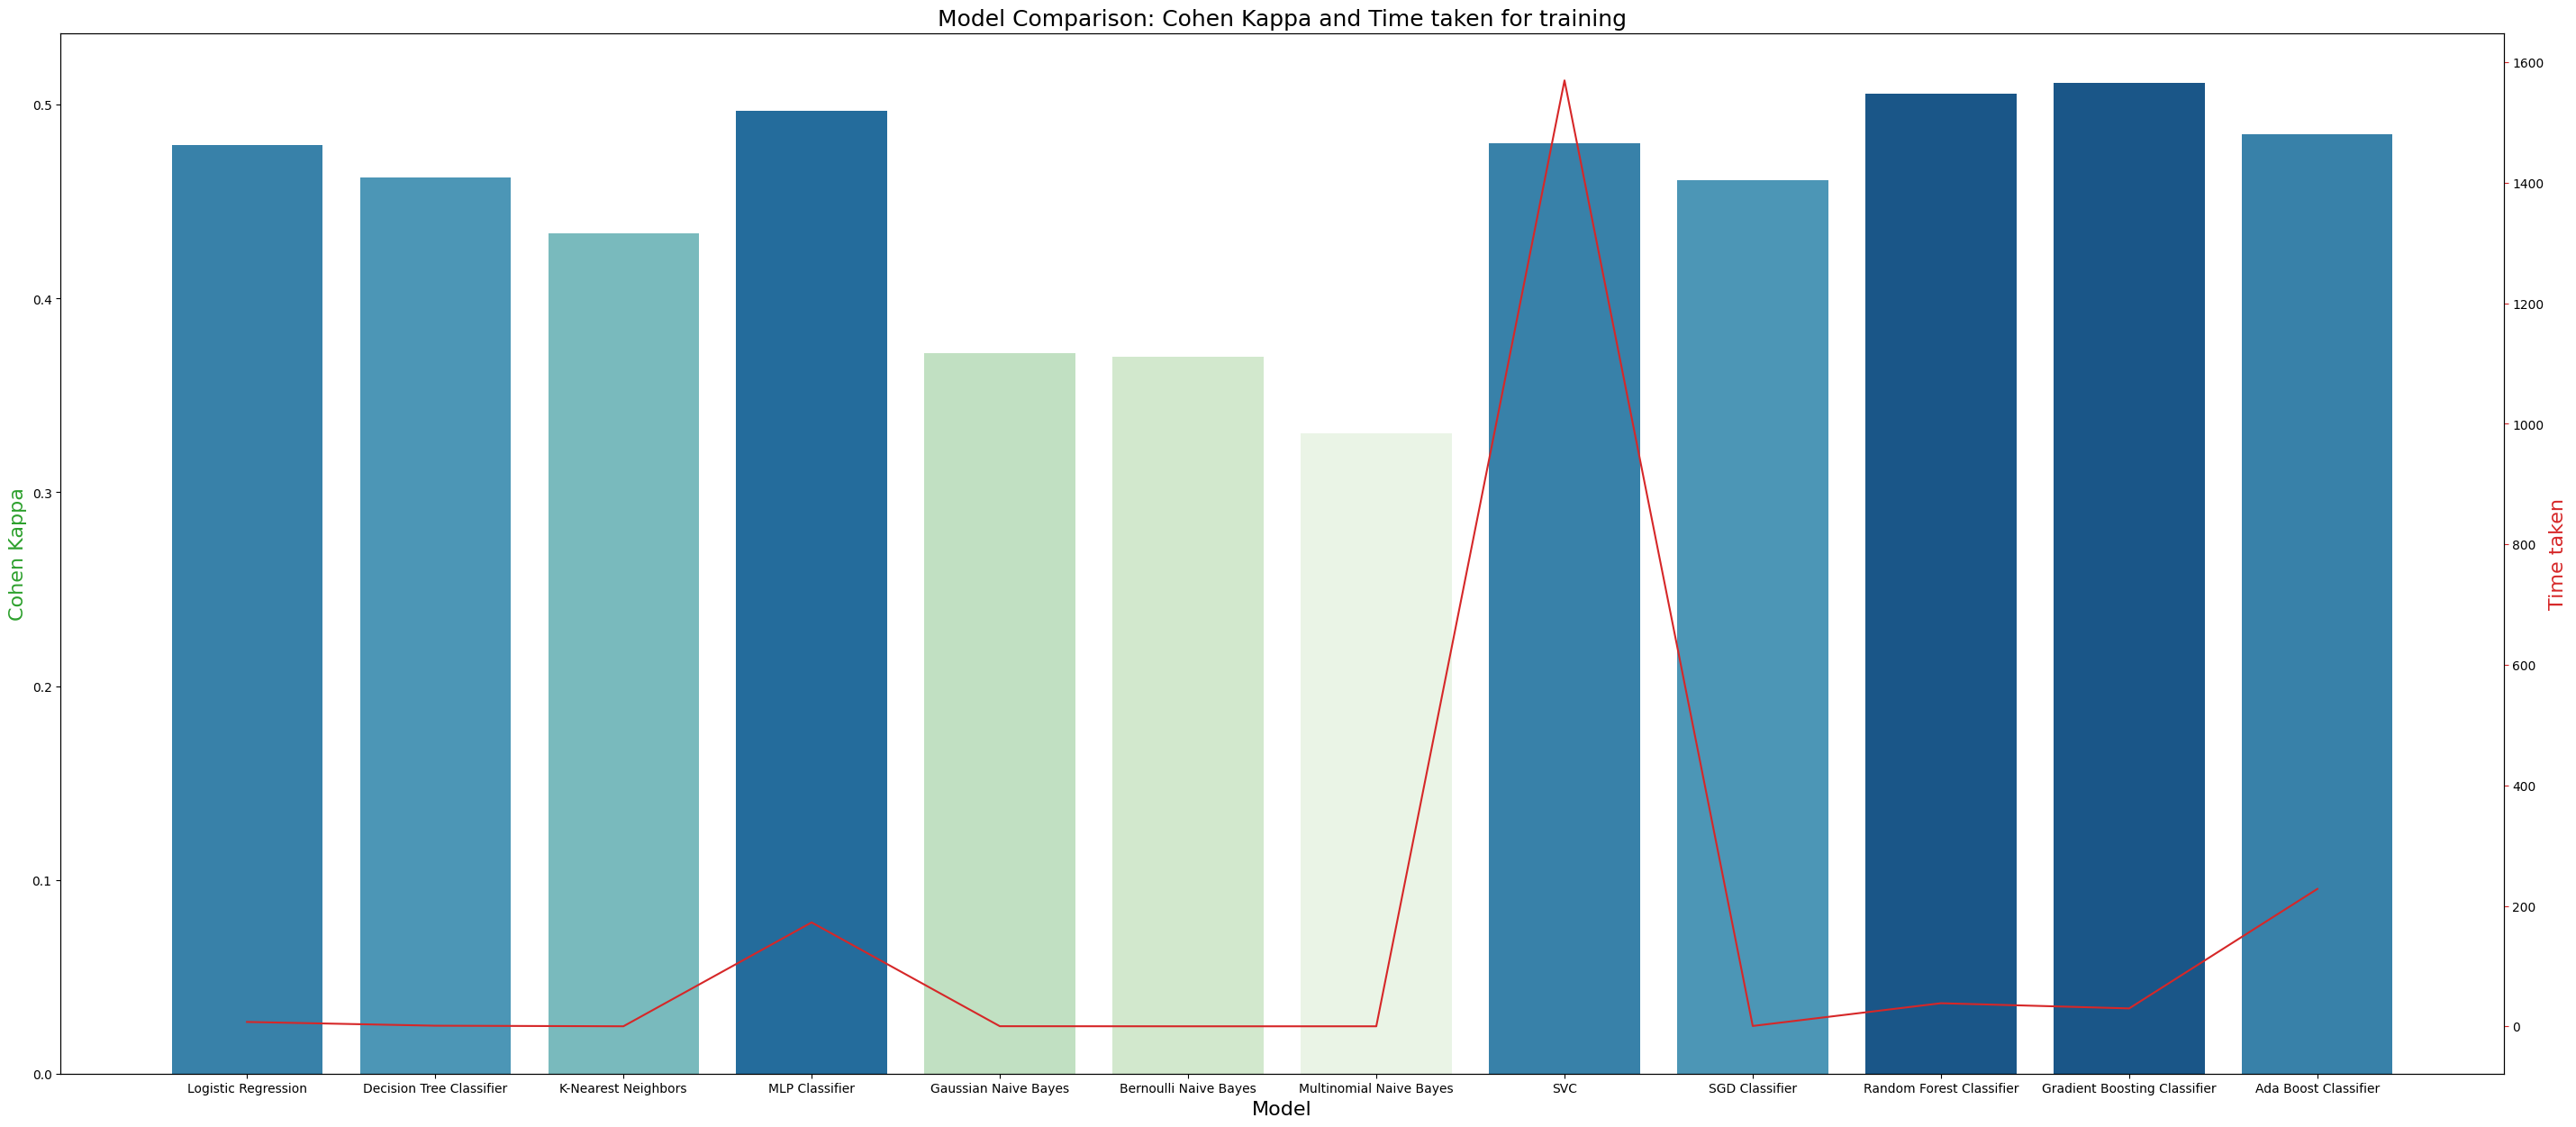

In [83]:
fig, ax5 = plt.subplots(figsize=(35,15))
ax5.set_title('Model Comparison: Cohen Kappa and Time taken for training', fontsize=18)
color = 'tab:green'
ax5.set_xlabel('Model', fontsize=16)
ax5.set_ylabel('Balanced Accuracy', fontsize=16, color=color)
ax6 = sns.barplot(x='Model', y='Cohen Kappa', data = data, palette=colors_from_values(data['Cohen Kappa'], "GnBu"))
ax5.tick_params(axis='y')
ax6 = ax5.twinx()
color = 'tab:red'
ax6.set_ylabel('Time taken', fontsize=16, color=color)
ax6 = sns.lineplot(x='Model', y='Time taken', data = data, sort=False, color=color)
ax6.tick_params(axis='y', color=color)

Learning curve is used to compare the performance of the models on training and testing data over a varying number of training instances.

In [84]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_comb = pd.concat([X_train, X_test], axis=0)
y_comb = pd.concat([y_train, y_test], axis=0)

In [85]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(name, model):

    train_sizes = [range(1, 115000, 10000)]
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_comb[best_features_list[name]], y_comb, train_sizes = train_sizes, 
        cv = 10, n_jobs=-1, scoring = 'balanced_accuracy')
        
    train_scores_mean = train_scores.mean(axis = 1)   
    validation_scores_mean = validation_scores.mean(axis = 1)
        
    plt.plot(train_sizes, train_scores_mean, label='Training')
    plt.plot(train_sizes, validation_scores_mean, label='Validation')
        
    plt.ylabel('Balanced Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curve for '+ name
    plt.title(title, fontsize=14, y=1.05)
    plt.legend()
    plt.ylim(0,1.0)

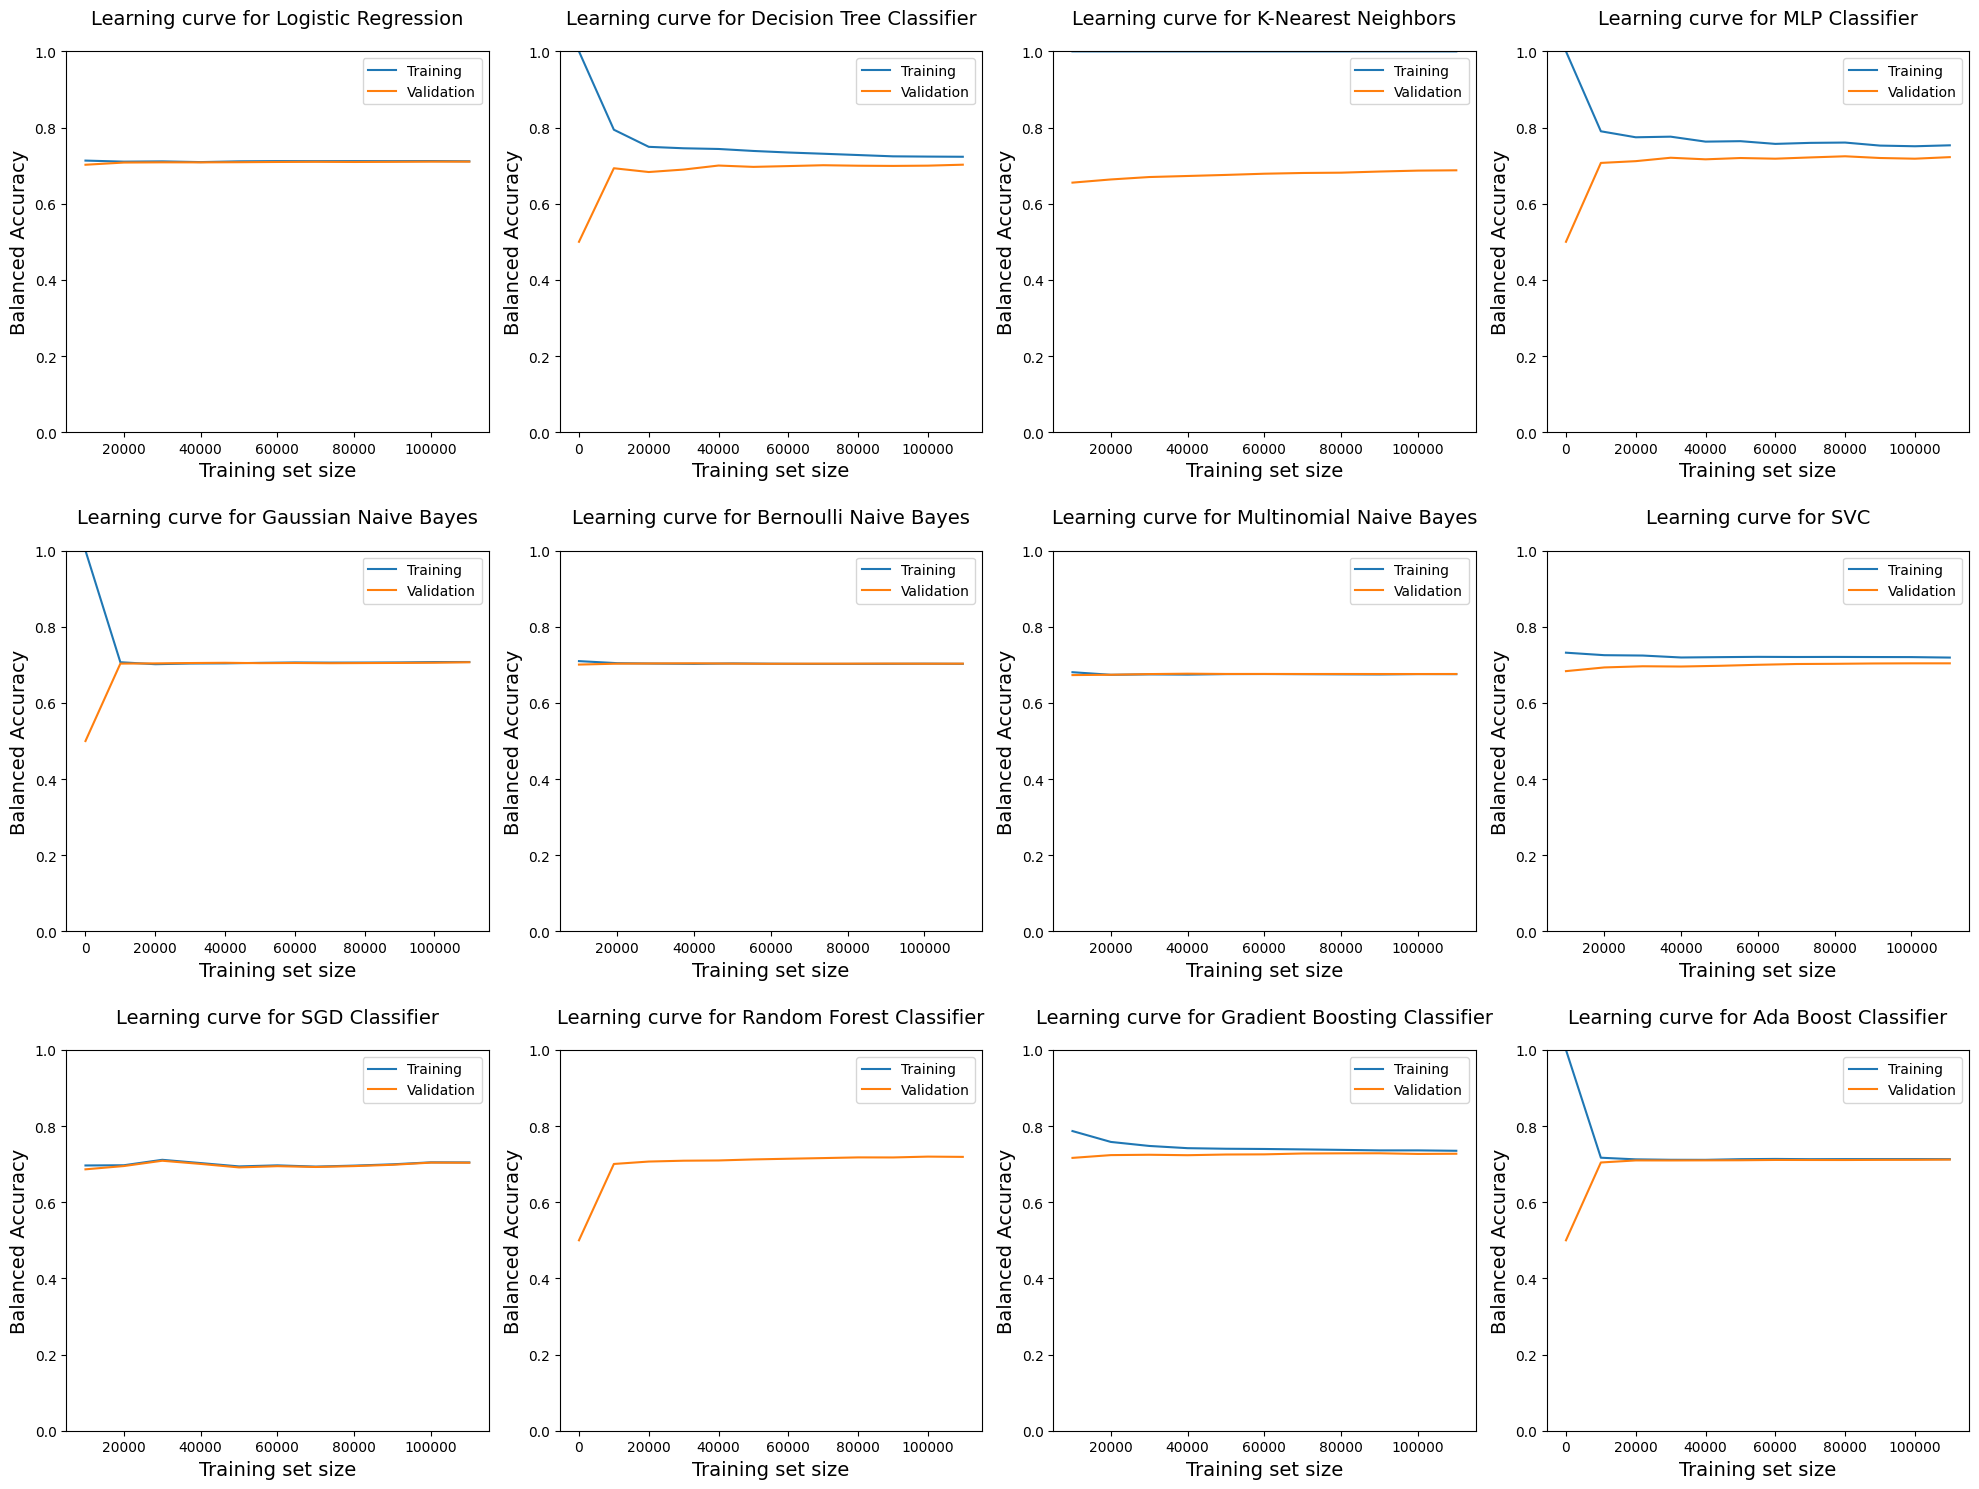

In [86]:
n_rows = (len(models_tuned) // 4) + (len(models_tuned) % 4 > 0)
n_columns = 4
index = 1

plt.figure(figsize=(5*n_columns,5*n_rows))

for name, model in models_tuned.items():
    plt.subplot(n_rows, n_columns, index)
    plt.tight_layout(h_pad=2)
    plot_learning_curve(name, model)
    index = index + 1

In [87]:
performance["Rank"] = performance[['F1', 'PR-AUC', 'ROC-AUC', 'Cohen Kappa']].apply(tuple,axis=1)\
             .rank(method='dense',ascending=False).astype(int)

performance.sort_values("Rank")

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time,Rank
10,Gradient Boosting Classifier,0.850870,0.728013,0.800921,0.728013,0.753955,0.704789,0.873200,0.511433,29.792558,0.160471,1
9,Random Forest Classifier,0.853216,0.719381,0.814764,0.719381,0.750118,0.705919,0.874515,0.505732,38.382295,1.144543,2
3,MLP Classifier,0.844416,0.724670,0.785689,0.724670,0.746970,0.676286,0.858961,0.496905,172.477529,0.065425,3
11,Ada Boost Classifier,0.845980,0.711815,0.797364,0.711815,0.739872,0.683374,0.861743,0.484928,228.113714,8.325647,4
0,Logistic Regression,0.843213,0.710804,0.789732,0.710804,0.737299,0.668975,0.857195,0.479309,7.309259,0.032114,5
7,SVC,0.848876,0.703971,0.814038,0.703971,0.736300,0.692642,0.854356,0.480255,1569.995374,308.146263,6
1,Decision Tree Classifier,0.838658,0.702573,0.781776,0.702573,0.728539,0.640636,0.842050,0.462259,1.061263,0.030618,7
8,SGD Classifier,0.841975,0.697550,0.795896,0.697550,0.726859,0.667876,0.854632,0.460975,0.628832,0.023041,8
2,K-Nearest Neighbors,0.832927,0.686879,0.774011,0.686879,0.713391,0.623003,0.826953,0.433688,0.109208,85.822182,9
4,Gaussian Naive Bayes,0.760123,0.707410,0.672559,0.707410,0.683880,0.498798,0.779662,0.371874,0.231979,0.060140,10


## Stacking The Best Models

- Based on the evalution of the 12 models, the Gradient Boosting Classifier, Ada Boost Classifier and the Logistic Regression models were chosen as the 3 best performing models with least overfitting.
- These models were chosen to stack in an attempt to generate a potentially better performing model.

In [88]:
from sklearn.ensemble import StackingClassifier 

def init_stacking():
    level0 = []
    level0.append(('Ada Boost Classifier', models_tuned['Ada Boost Classifier']))
    level0.append(('Gradient Boosting Classifier', models_tuned['Gradient Boosting Classifier']))
    level1 = models_tuned['Logistic Regression']
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1)
    
    return model 

def init_stacking2():
    level0 = []
    level0.append(('Ada Boost Classifier', models_tuned['Ada Boost Classifier']))
    level0.append(('Logistic Regression', models_tuned['Logistic Regression']))
    
    level1 = models_tuned['Gradient Boosting Classifier']
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1)
    
    return model 

def init_stacking3():
    level0 = []
    level0.append(('Gradient Boosting Classifier', models_tuned['Gradient Boosting Classifier']))
    level0.append(('Logistic Regression', models_tuned['Logistic Regression']))

    level1 = models_tuned['Ada Boost Classifier']
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1)
    
    return model 

In [89]:
models_stacking=[]
models_stacking.append(('Logistic Regression', models_tuned['Logistic Regression']))
models_stacking.append(('Ada Boost Classifier', models_tuned['Ada Boost Classifier']))
models_stacking.append(('Gradient Boosting Classifier', models_tuned['Gradient Boosting Classifier']))
models_stacking.append(('StackedClassifier1', init_stacking()))
models_stacking.append(('StackedClassifier2', init_stacking2()))
models_stacking.append(('StackedClassifier3', init_stacking3()))

best_features_list['StackedClassifier1'] = best_features_list['Logistic Regression']
best_features_list['StackedClassifier2'] = best_features_list['Gradient Boosting Classifier']
best_features_list['StackedClassifier3'] = best_features_list['Ada Boost Classifier']

In [90]:
def evaluate_models(model_list, X_data):
  
  cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

  scoring = {'accuracy': 'accuracy',
            'balanced_accuracy': 'balanced_accuracy',
            'precision_macro': 'precision_macro',
            'recall_macro': 'recall_macro',
            'f1_macro': 'f1_macro',
            'average_precision': 'average_precision',
            'roc_auc': 'roc_auc',
            'cohen_kappa': make_scorer(cohen_kappa_score)}

  scores_accuracy = []
  scores_balanced_accuracy = []
  scores_precision = []
  scores_recall = []
  scores_f1 = []
  scores_average_precision = []
  scores_roc_auc = []
  scores_cohen_kappa = []
  fit_time = []
  score_time = []

  for name, model in model_list:
    score = cross_validate(model, X_data[best_features_list[name]], y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    scores_accuracy.append(score['test_accuracy'].mean())
    scores_balanced_accuracy.append(score['test_balanced_accuracy'].mean())
    scores_precision.append(score['test_precision_macro'].mean())
    scores_recall.append(score['test_recall_macro'].mean())
    scores_f1.append(score['test_f1_macro'].mean())
    scores_average_precision.append(score['test_average_precision'].mean())
    scores_roc_auc.append(score['test_roc_auc'].mean())
    scores_cohen_kappa.append(score['test_cohen_kappa'].mean())
    fit_time.append(score['fit_time'].mean())
    score_time.append(score['score_time'].mean())

  performance = pd.DataFrame({
      'Model': [model[0] for model in model_list],
      'Accuracy': scores_accuracy,
      'Balanced Accuracy': scores_balanced_accuracy,
      'Precision': scores_precision,
      'Recall': scores_recall,
      'F1': scores_f1,
      'PR-AUC': scores_average_precision,
      'ROC-AUC': scores_roc_auc,
      'Cohen Kappa': scores_cohen_kappa,
      'Fit Time': fit_time,
      'Score Time': score_time
    })

  return performance

In [91]:
performance2 = evaluate_models(models_stacking, X_train)

In [92]:
performance2.to_csv('performance_with_stacking.csv')

In [93]:
display(performance2)

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time
0,Logistic Regression,0.843213,0.710804,0.789732,0.710804,0.737299,0.668975,0.857195,0.479309,7.083563,0.034009
1,Ada Boost Classifier,0.845980,0.711815,0.797364,0.711815,0.739872,0.683374,0.861743,0.484928,215.005341,8.020874
2,Gradient Boosting Classifier,0.850560,0.727463,0.800407,0.727463,0.753380,0.704106,0.873079,0.510309,29.784977,0.159085
3,StackedClassifier1,0.851067,0.728366,0.801250,0.728366,0.754298,0.706457,0.875761,0.512116,2307.023084,15.818414
4,StackedClassifier2,0.845877,0.714427,0.795255,0.714427,0.741578,0.681130,0.861015,0.487836,1274.509691,7.572561
5,StackedClassifier3,0.850053,0.723389,0.801568,0.723389,0.750369,0.700518,0.872966,0.504843,259.498304,3.970885


## Model Evaluation

In [94]:
balanced_accuracy_scores = performance2['Balanced Accuracy']
f1_scores = performance2['F1']
pr_auc_scores = performance2['PR-AUC']
roc_auc_scores = performance2['ROC-AUC']
coh_kap_scores = performance2['Cohen Kappa']
tt = performance2['Fit Time']

model_data = {'Model': ['Logistic Regression', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'StackedClassifier1', 'StackedClassifier2', 'StackedClassifier3'],
              'Balanced Accuracy': balanced_accuracy_scores,
              'F1' : f1_scores,
              'PR_AUC': pr_auc_scores,
              'ROC_AUC' : roc_auc_scores,
              'Cohen Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

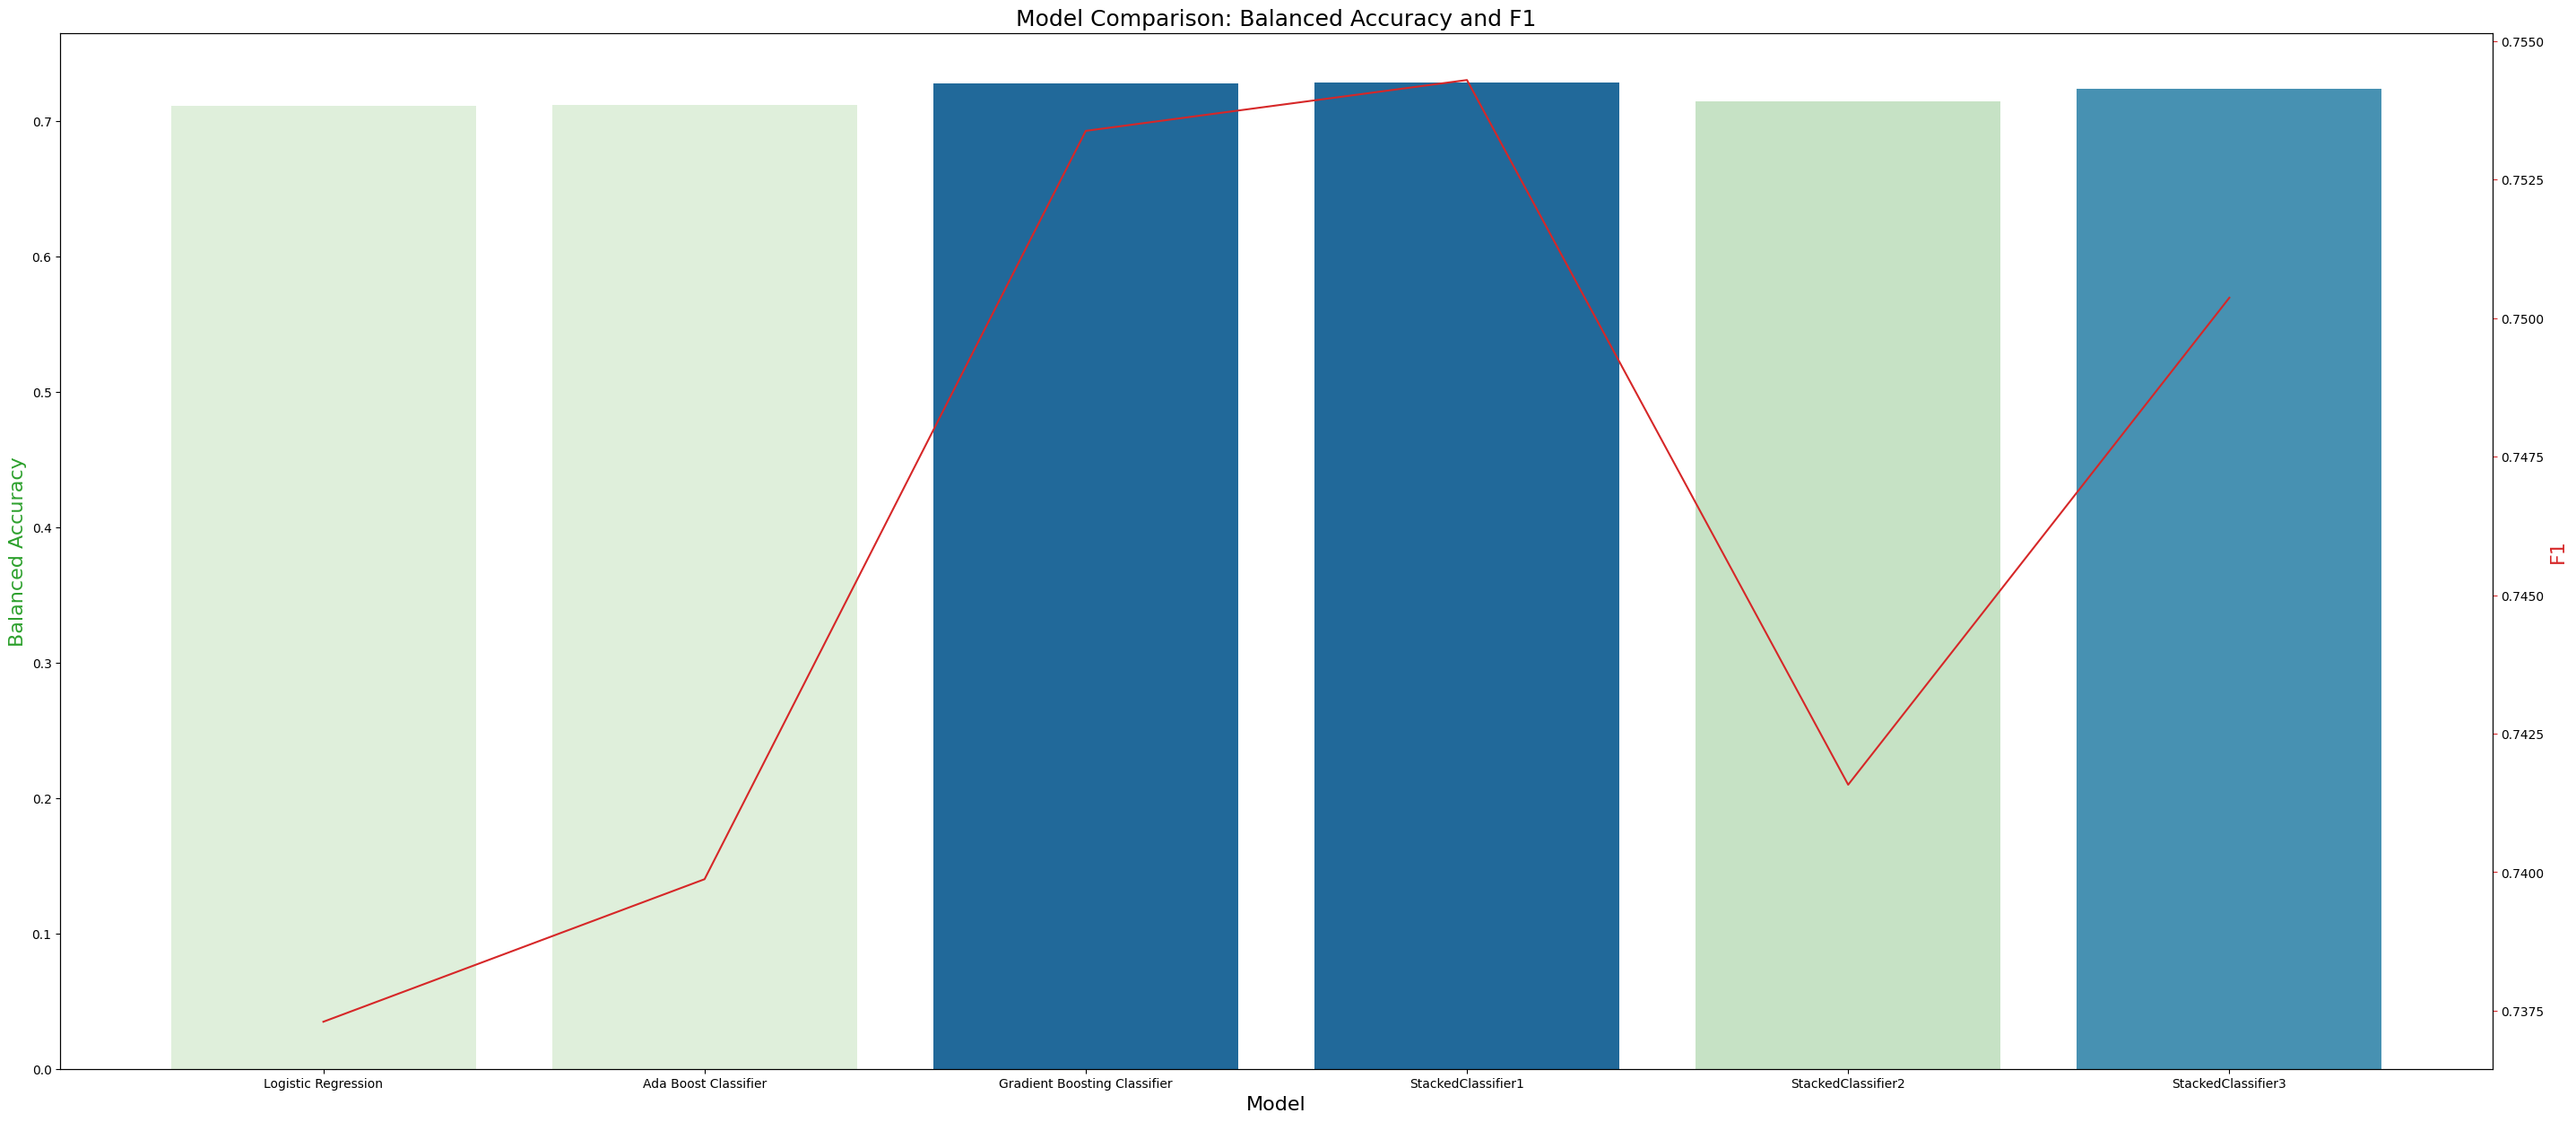

In [95]:
fig, ax1 = plt.subplots(figsize=(35,15))
ax1.set_title('Model Comparison: Balanced Accuracy and F1', fontsize=18)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=16)
ax1.set_ylabel('Balanced Accuracy', fontsize=16, color=color)
ax2 = sns.barplot(x='Model', y='Balanced Accuracy', data = data, palette=colors_from_values(data['Balanced Accuracy'], "GnBu"))
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('F1', fontsize=16, color=color)
ax2 = sns.lineplot(x='Model', y='F1', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

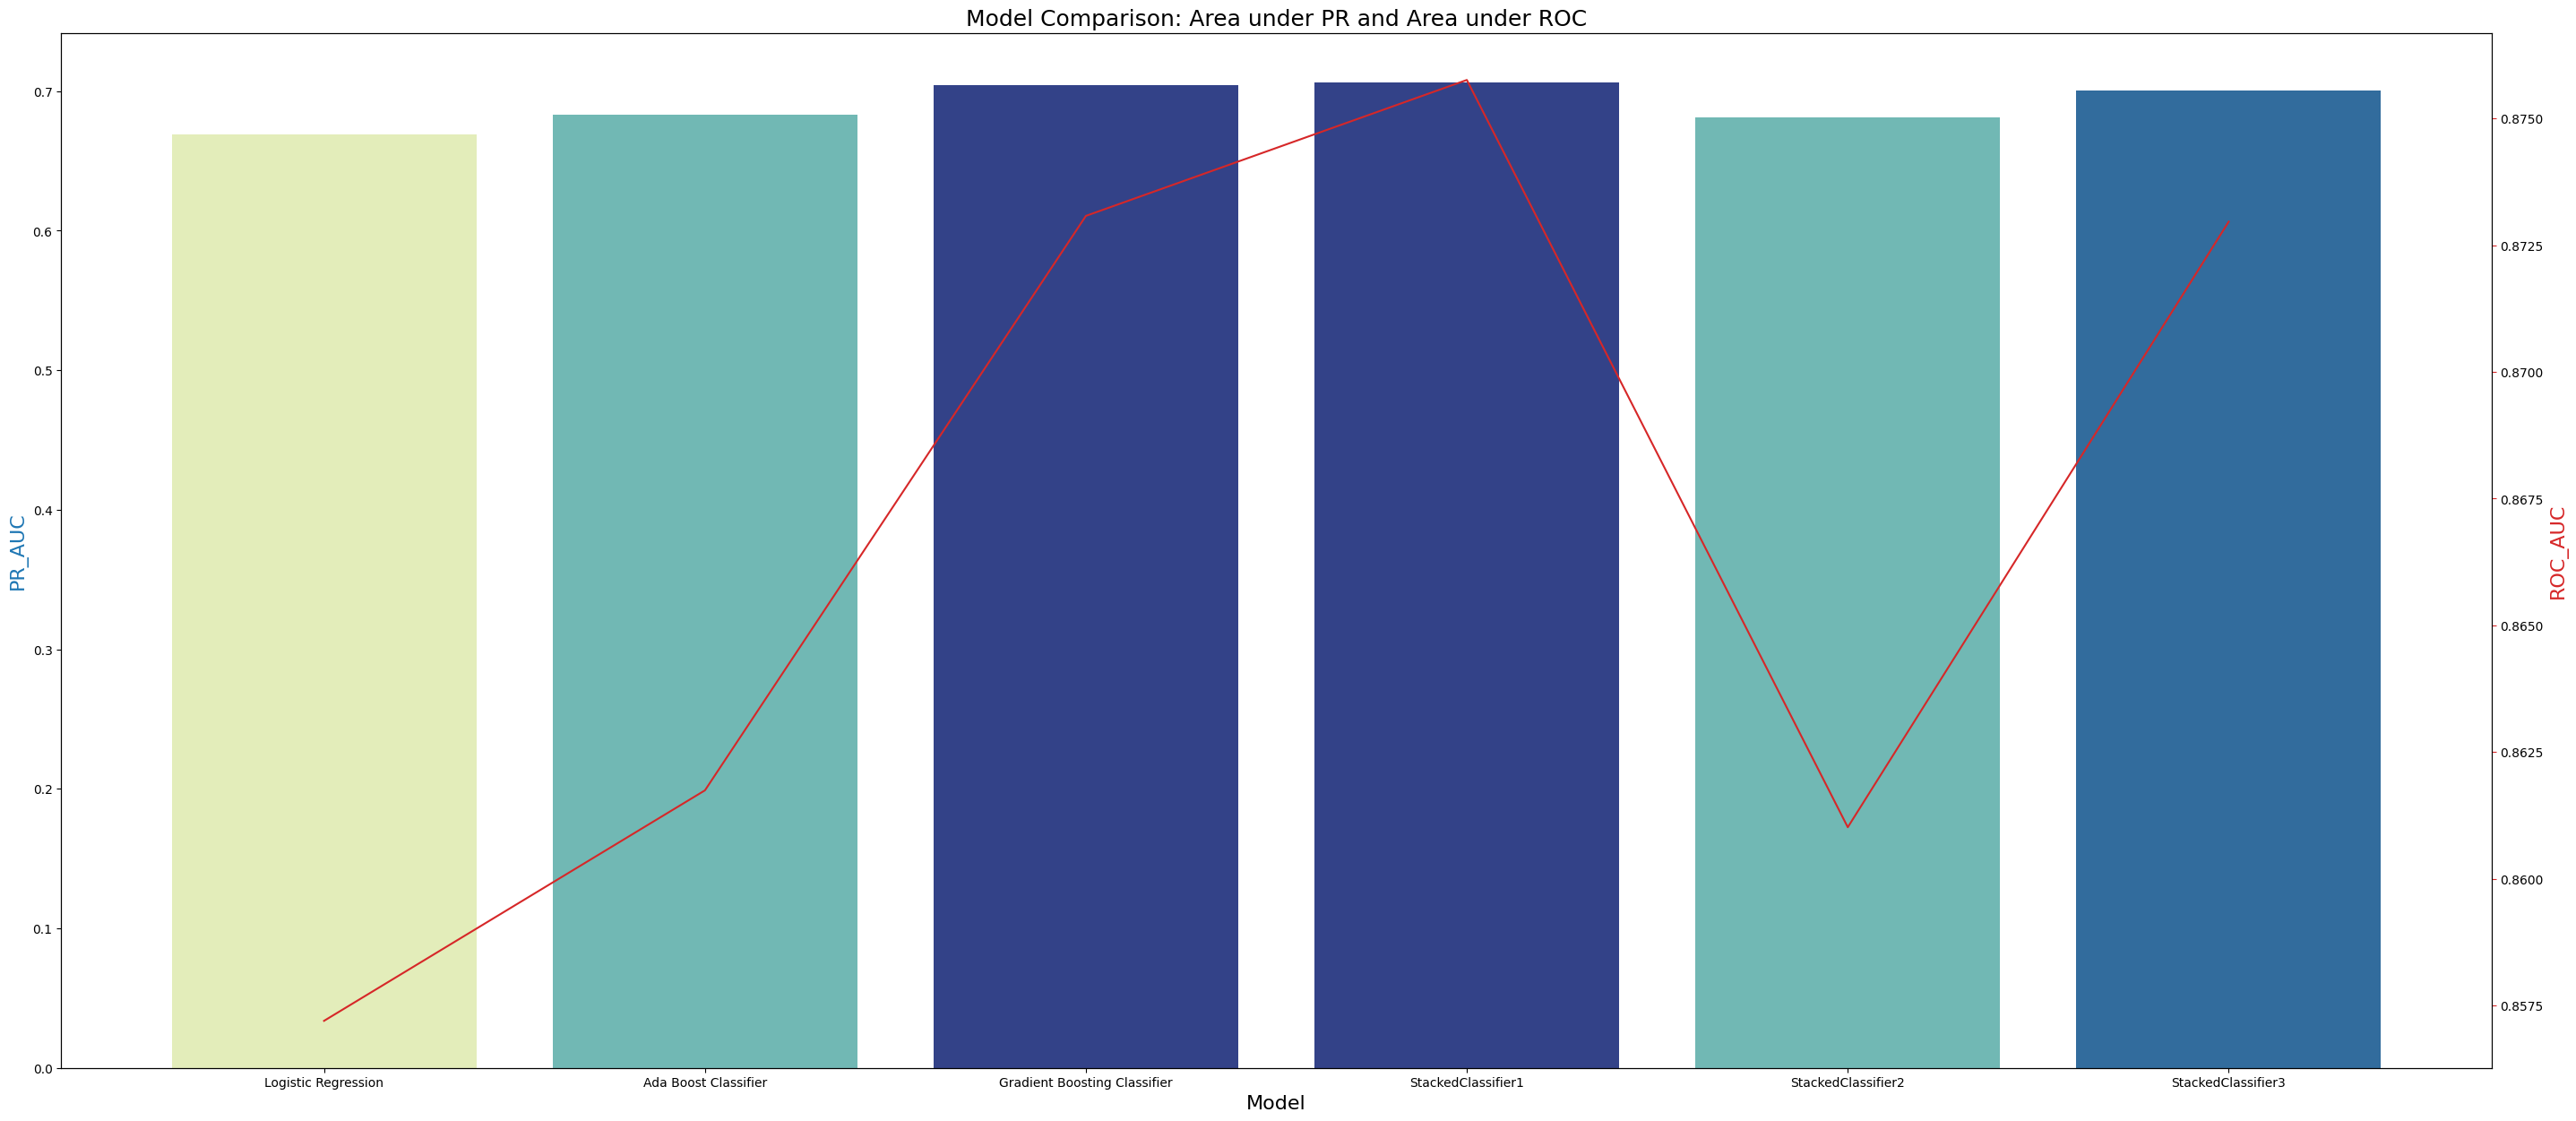

In [96]:
fig, ax3 = plt.subplots(figsize=(35,15))
ax3.set_title('Model Comparison: Area under PR and Area under ROC', fontsize=18)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=16)
ax3.set_ylabel('PR_AUC', fontsize=16, color=color)
ax4 = sns.barplot(x='Model', y='PR_AUC', data = data, palette=colors_from_values(data['PR_AUC'], "YlGnBu"))
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('ROC_AUC', fontsize=16, color=color)
ax4 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

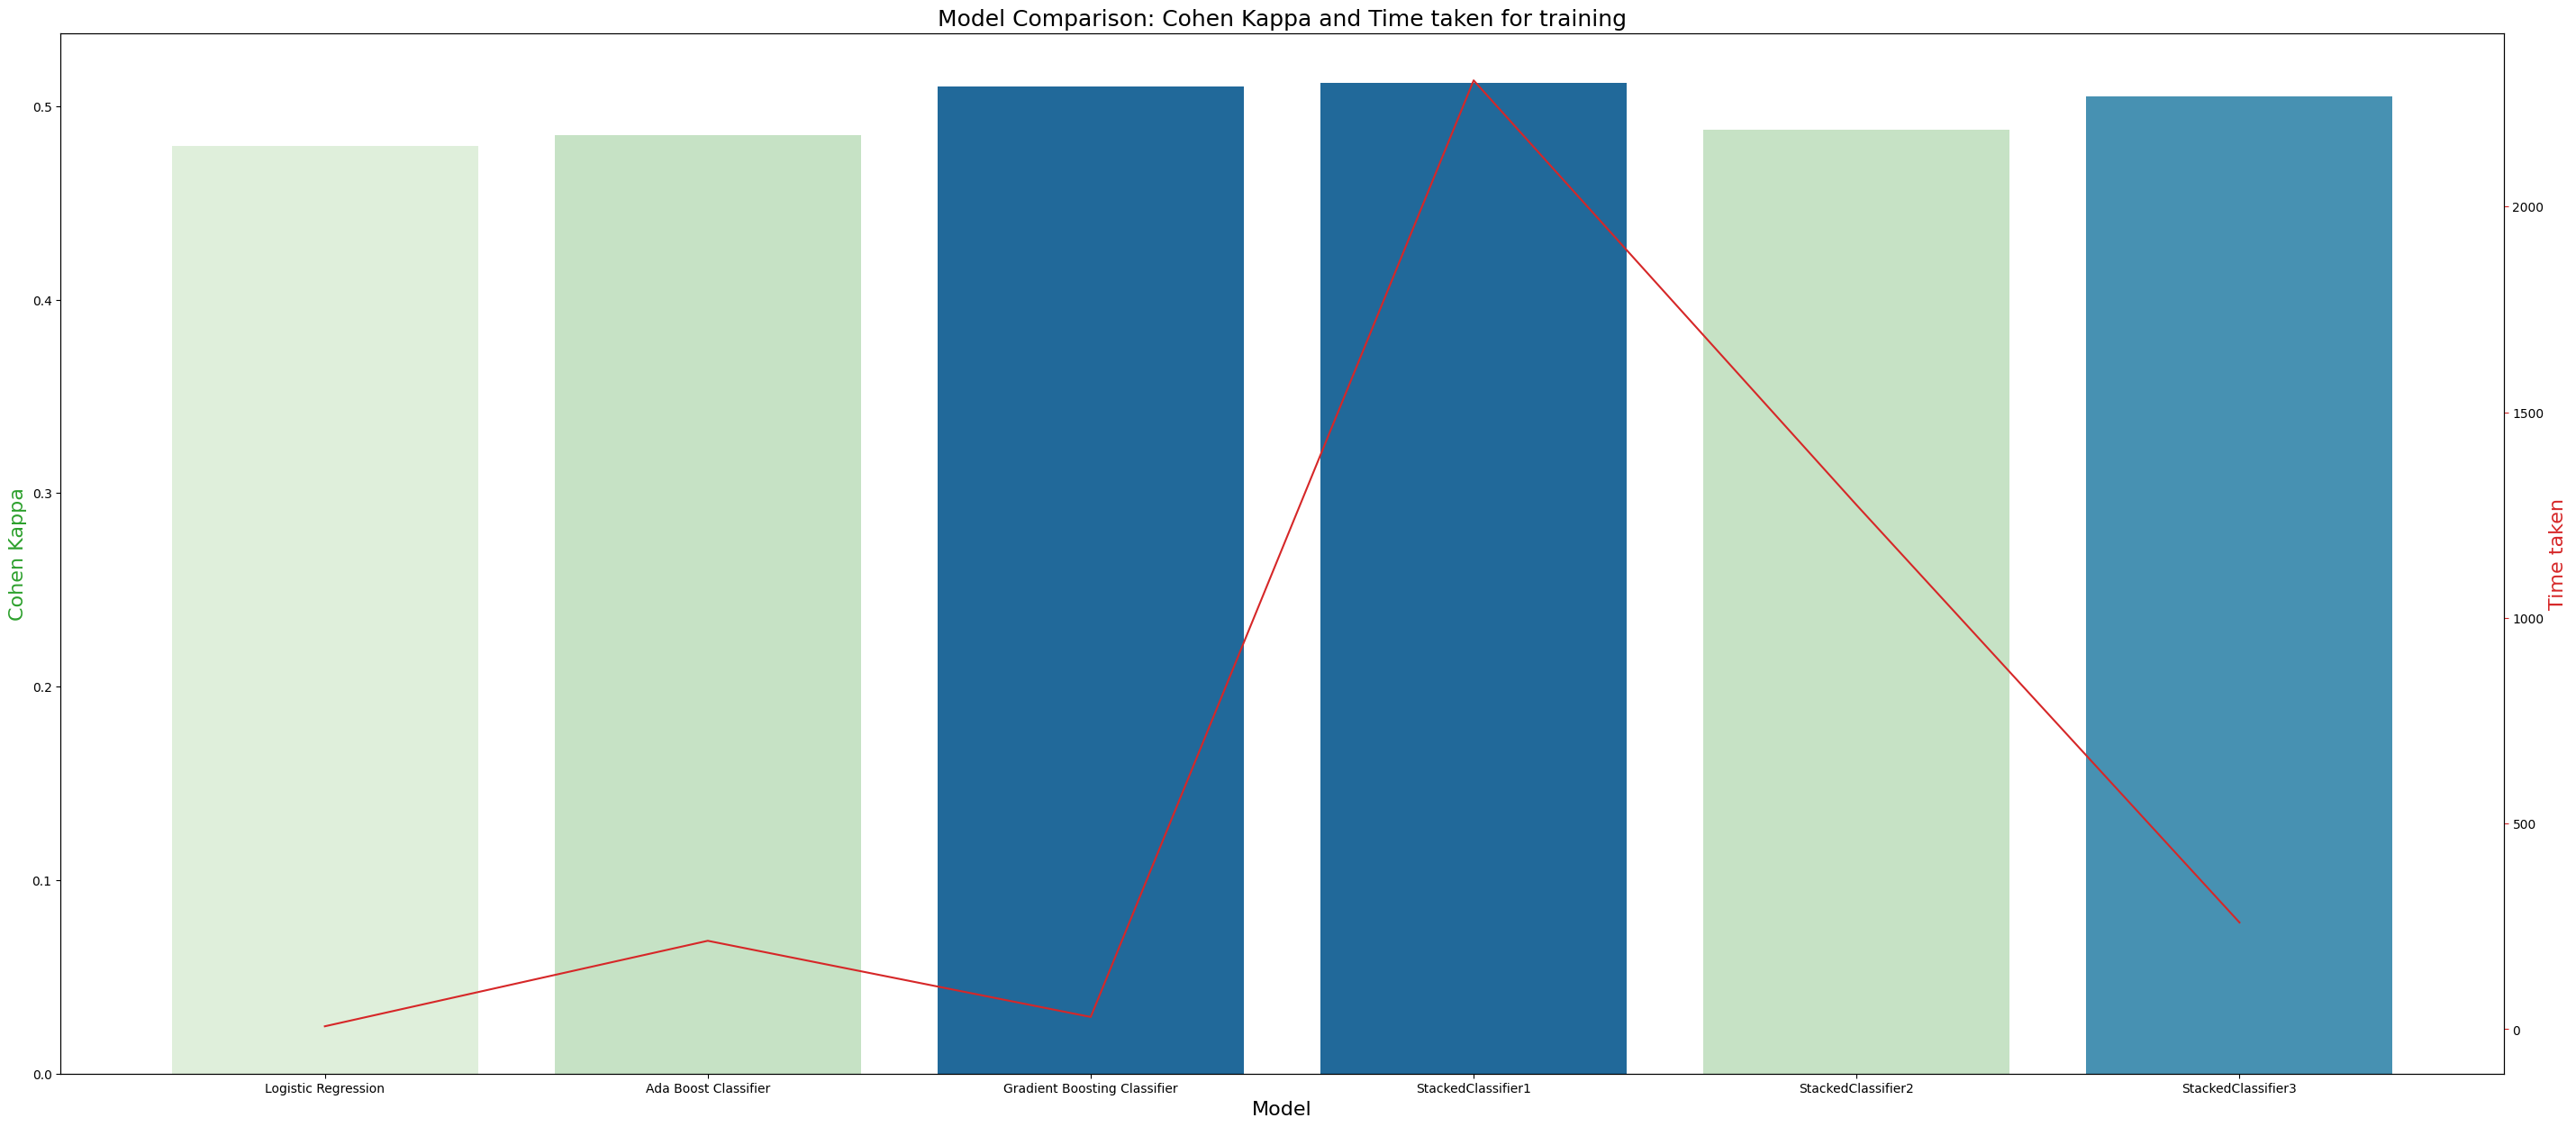

In [97]:
fig, ax5 = plt.subplots(figsize=(35,15))
ax5.set_title('Model Comparison: Cohen Kappa and Time taken for training', fontsize=18)
color = 'tab:green'
ax5.set_xlabel('Model', fontsize=16)
ax5.set_ylabel('Balanced Accuracy', fontsize=16, color=color)
ax6 = sns.barplot(x='Model', y='Cohen Kappa', data = data, palette=colors_from_values(data['Cohen Kappa'], "GnBu"))
ax5.tick_params(axis='y')
ax6 = ax5.twinx()
color = 'tab:red'
ax6.set_ylabel('Time taken', fontsize=16, color=color)
ax6 = sns.lineplot(x='Model', y='Time taken', data = data, sort=False, color=color)
ax6.tick_params(axis='y', color=color)

In [98]:
performance2["Rank"] = performance2[['F1', 'PR-AUC', 'ROC-AUC', 'Cohen Kappa']].apply(tuple,axis=1)\
             .rank(method='dense',ascending=False).astype(int)

performance2.sort_values("Rank")

,Model,Accuracy,Balanced Accuracy,Precision,Recall,F1,PR-AUC,ROC-AUC,Cohen Kappa,Fit Time,Score Time,Rank
3,StackedClassifier1,0.851067,0.728366,0.801250,0.728366,0.754298,0.706457,0.875761,0.512116,2307.023084,15.818414,1
2,Gradient Boosting Classifier,0.850560,0.727463,0.800407,0.727463,0.753380,0.704106,0.873079,0.510309,29.784977,0.159085,2
5,StackedClassifier3,0.850053,0.723389,0.801568,0.723389,0.750369,0.700518,0.872966,0.504843,259.498304,3.970885,3
4,StackedClassifier2,0.845877,0.714427,0.795255,0.714427,0.741578,0.681130,0.861015,0.487836,1274.509691,7.572561,4
1,Ada Boost Classifier,0.845980,0.711815,0.797364,0.711815,0.739872,0.683374,0.861743,0.484928,215.005341,8.020874,5
0,Logistic Regression,0.843213,0.710804,0.789732,0.710804,0.737299,0.668975,0.857195,0.479309,7.083563,0.034009,6


Learning curve is used to compare the performance of the models on training and testing data over a varying number of training instances.

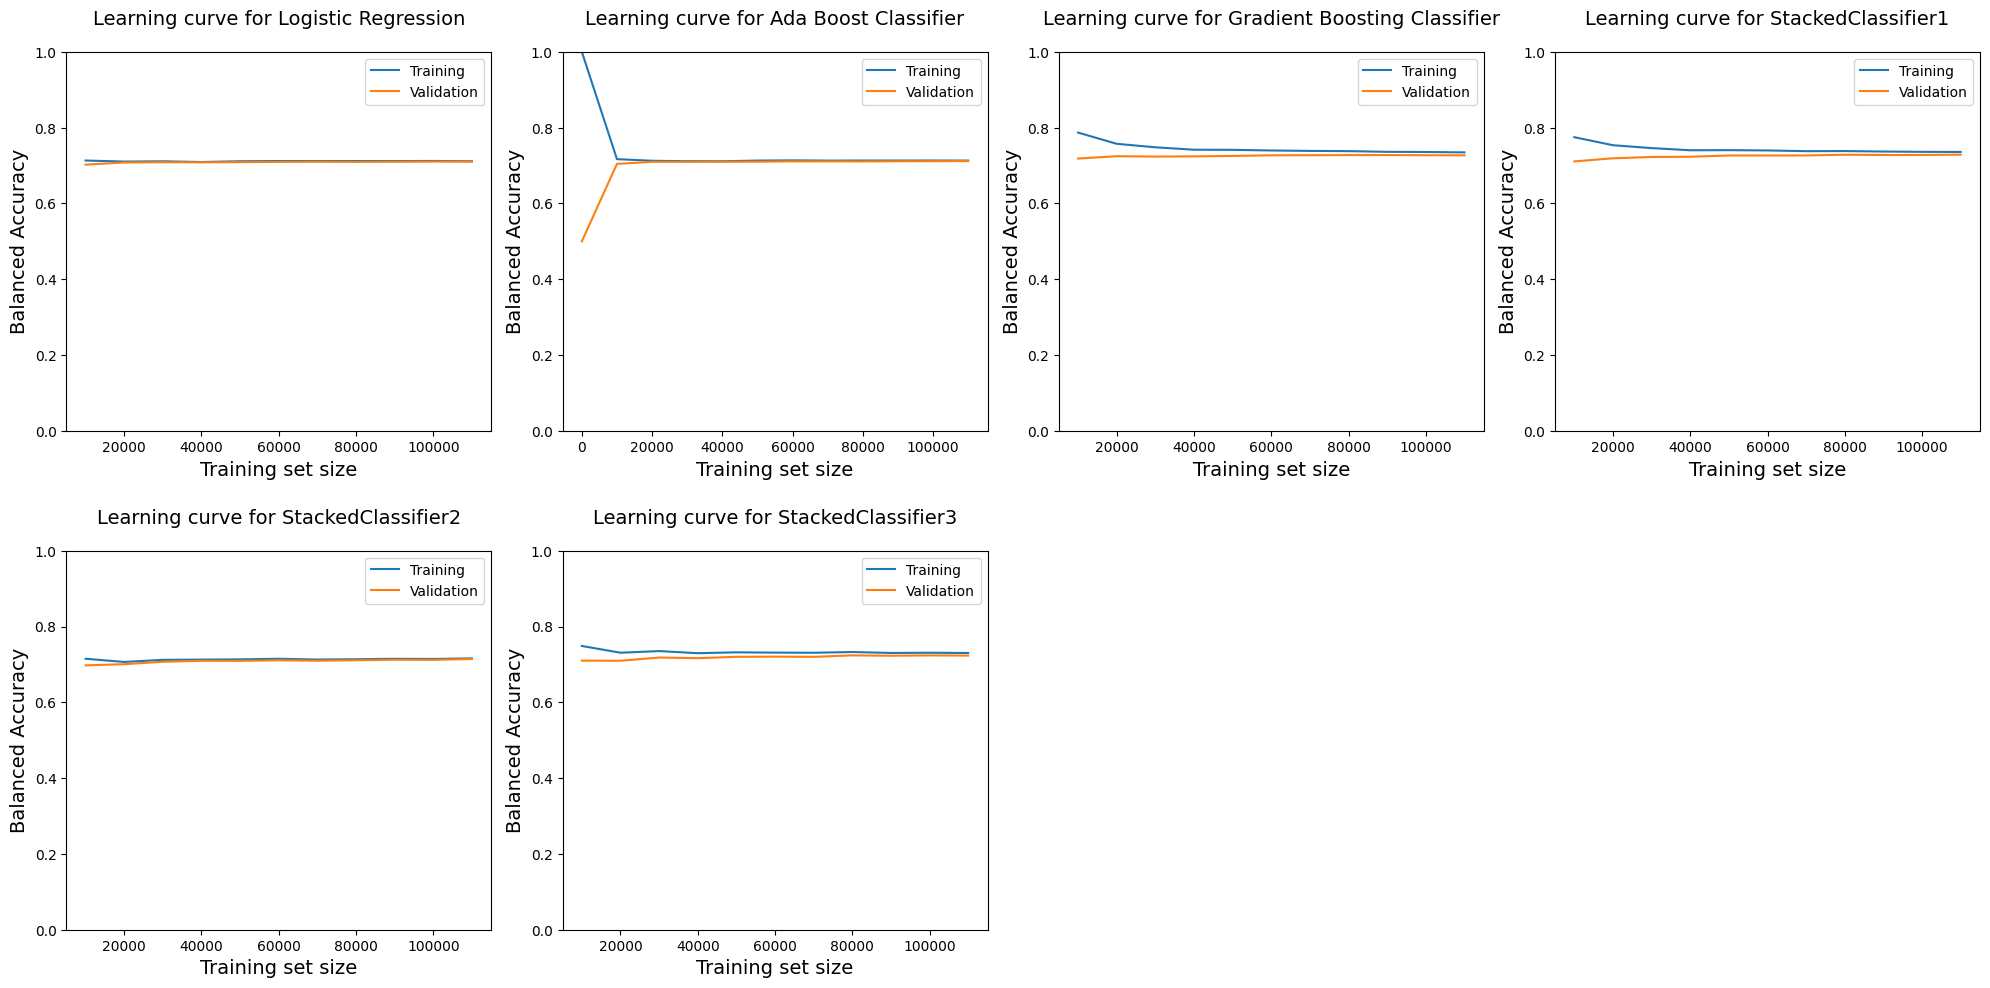

In [99]:
n_rows = (len(models_stacking) // 4) + (len(models_stacking) % 4 > 0)
n_columns = 4
index = 1

plt.figure(figsize=(5*n_columns,5*n_rows))

for name, model in models_stacking:
    plt.subplot(n_rows, n_columns, index)
    plt.tight_layout(h_pad=2)
    plot_learning_curve(name, model)
    index = index + 1

From the Learning Curves, we can conclude that:

- The 3 best models and the 3 Stacked models have minimal overfitting because the validation balanced accuracy scores are almost the same as the training balanced accuracy scores.

# Conclusion and Results

- By considering the balanced accuracy, F1, PR-AUC, ROC-AUC, Cohen's Kappa, Training Time and learning curve, the best model is the Stacked Classifier 1 which consists of the GradientBoostingClassifier(learning_rate=0.2, loss='exponential', max_depth=8, max_features='log2', min_samples_leaf=5, min_samples_split=0.1, n_estimators=150) and the AdaBoostClassifier(learning_rate=0.1, n_estimators=1000) models as level 0 and the Loggistic Regression model with default parameters as level 1. 
    - The model uses the parameters 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'RainToday', 'Day', 'Month', 'Year', 'Location_encoded_Adelaide', 'Location_encoded_Albany', 'Location_encoded_Albury', 'Location_encoded_AliceSprings', 'Location_encoded_BadgerysCreek', 'Location_encoded_Cobar', 'Location_encoded_CoffsHarbour', 'Location_encoded_Dartmoor', 'Location_encoded_Darwin', 'Location_encoded_MelbourneAirport', 'Location_encoded_Mildura', 'Location_encoded_Moree', 'Location_encoded_Nhil', 'Location_encoded_Nuriootpa', 'Location_encoded_PerthAirport', 'Location_encoded_Portland', 'Location_encoded_SalmonGums', 'Location_encoded_Sydney', 'Location_encoded_SydneyAirport', 'Location_encoded_Uluru', 'Location_encoded_Watsonia', 'Location_encoded_Williamtown', 'Location_encoded_Wollongong', 'Location_encoded_Woomera', 'WindGustDir_encoded_E', 'WindGustDir_encoded_ESE', 'WindGustDir_encoded_N', 'WindGustDir_encoded_NE', 'WindGustDir_encoded_NNW', 'WindGustDir_encoded_NW', 'WindGustDir_encoded_S', 'WindGustDir_encoded_SE', 'WindGustDir_encoded_SSW', 'WindGustDir_encoded_SW', 'WindGustDir_encoded_W', 'WindDir9am_encoded_E', 'WindDir9am_encoded_ENE', 'WindDir9am_encoded_N', 'WindDir9am_encoded_NNW', 'WindDir9am_encoded_NW', 'WindDir9am_encoded_S', 'WindDir9am_encoded_SE', 'WindDir9am_encoded_SSE', 'WindDir9am_encoded_SSW', 'WindDir9am_encoded_SW', 'WindDir9am_encoded_W', 'WindDir9am_encoded_WNW', 'WindDir9am_encoded_WSW', 'WindDir3pm_encoded_E', 'WindDir3pm_encoded_ENE', 'WindDir3pm_encoded_ESE', 'WindDir3pm_encoded_N', 'WindDir3pm_encoded_NE', 'WindDir3pm_encoded_NNE', 'WindDir3pm_encoded_NNW', 'WindDir3pm_encoded_NW', 'WindDir3pm_encoded_S', 'WindDir3pm_encoded_SE', 'WindDir3pm_encoded_SSE', 'WindDir3pm_encoded_SSW', 'WindDir3pm_encoded_SW', 'WindDir3pm_encoded_W', 'WindDir3pm_encoded_WNW', 'WindDir3pm_encoded_WSW'.

- The model has a balanced accuracy of 0.728366, F1 score of 0.754298, PR-AUC of 0.706457, ROC-AUC of 0.875761, Cohen's Kappa score of 0.512116 and Training Time of 2307.023084s.

- The model is able to generalise well on the testing data and can predict rain in Australia with an accuracy of 0.851067.